<a href="https://colab.research.google.com/github/toughhyeok/kaggle-titanic/blob/main/kaggle_titanic_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Challenge

![](https://i.imgur.com/rRFchA8.png)

<a id = "table_of_contents"></a>
## Table of contents

- [Setup & Import modules](#part1)
- [Merge dataset](#part2)
- [Check for missing values and features](#part3)
- [Exploratory Data Analysis](#part4)
- [Feature Engineering](#part5)
- [Determining the final item](#part6)
- [Creating a Machine Learning Model](#part7)
- [Reset model according to importance](#part8)
- [Tuning Hyper parameter](#part9)
- [Re-training Model](#part10)
- [Last Voting](#part11)
- [Last Prediction Model](#part12)   
- [Submissions](#part13)

<a id = "part1"></a>
## Setup & Import modules
[Go to the Table of Contents](#table_of_contents)

In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# Preprocessing & Machine Learning
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# Tuning Model and evaluating model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

# Delete pandas warning
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

/var/folders/jv/3tnpth_j4bv0lr19qvfl9jtw0000gn/T/ipykernel_91227/2496690026.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


### Ref
- [Joshua Choi's titanic pandas 101 example](https://www.kaggle.com/joshuajhchoi/101-pandas-tips-for-beginners-titanic-en-kr)
- [Joshua Choi's titanic visualization 101 example](https://www.kaggle.com/joshuajhchoi/101-data-visualization-tips-for-titanic-beginners)

### CSV to DF

In [2]:
test = pd.read_csv('./input/titanic/test.csv')
train = pd.read_csv('./input/titanic/train.csv')

In [3]:
train.head(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


By default, only columns with continuous values are shown, but if you set `include='all'`, you can see all values.

In [5]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


`dtypes` shows the data type of all columns.

In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

`info()` is an advanced concept of `dtypes`, showing not only the data types but also the number of non-blank.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train.columns[3], train.columns[3:5]

('Name', Index(['Name', 'Sex'], dtype='object'))

In [10]:
train[5:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [11]:
train.shape

(891, 12)

<a id = "part2"></a>
## Merge dataset
[Go to the Table of Contents](#table_of_contents)

- assign the shape of `ntrain` and `ntest`. (to split the merged one later)
- As `y_train` is the known result, it is stored separately.
- The `PassengerId` of the test is separated because it will be included in the final result later.
- Merge train and test to create data.

In [12]:
ntrain = train.shape[0]
ntest = test.shape[0]

y_train = train['Survived'].values
passId = test['PassengerId']

data = pd.concat((train, test))

print("data size is: {}".format(data.shape))

data size is: (1309, 12)


In [13]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<a id = "part3"></a>
## Check for missing values and features
[Go to the Table of Contents](#table_of_contents)

<Axes: >

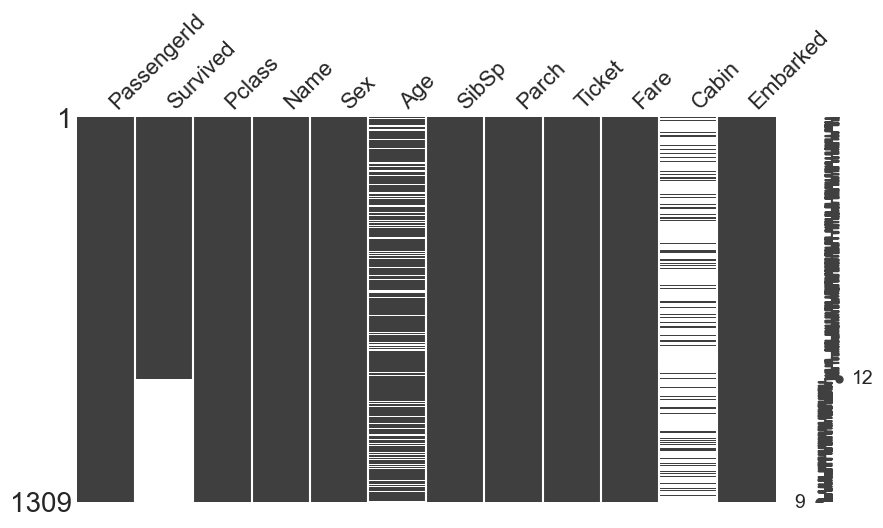

In [14]:
missingno.matrix(data, figsize = (10,5))

The chart above allows you to intuitively see missing values.

The `Survived` column below is empty because it's the part we need to predict as an answer in the test.

In [15]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [16]:
data.Age.isnull().any()

True

In [17]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

[View Titanic column names on the Kaggle page (you can see the Dictionary in the middle of the page)](https://www.kaggle.com/c/titanic/data)

### Features Section

### Types of Features

- Categorical Features

    Categorical features are items consisting of categorical variables. A categorical variable is a variable with two or more outcome elements, and each value of this feature can be classified by category.

    For example, gender is a categorical variable with two categories (male and female).

    A discrete variable is also known as a categorical variable or a nominal variable.

    Nominal items in the data set include: Sex, Embark. We seem to need to convert Name, Ticket, etc. to this category.

- Ordinal Variable:

    An ordinal variable is one of the categorical types, but the difference is that there is a relative order (= ranking) or sorting between the values.

    In the data set, the ordinal item is PClass and we seem to need to convert and use Cabin into this category.

- Continuous Features:

    A continuous feature is an item with variables with continuous values. Here, we can see age as a representative example.

    Age, SipSp, Parch, Fare should be made into interval variables and applied to this.

- You can see the name of the column in the item below.
    | Variable | Definition | Key |
    | --- | --- | --- |
    | survival | Survival | 0 = No, 1 = Yes |
    | pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
    | sex | Sex |  |
    | Age | Age |  |
    | sibsp | # of siblings/spouses onboard |  |
    | parch | # of parents/children onboard |  |
    | ticket | Ticket number |  |
    | fare | Passenger fare |  |
    | cabin | Cabin number |  |
    | embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |
    

<a id = "part4"></a>
## Exploratory Data Analysis
[Go to the Table of Contents](#table_of_contents)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Let's take a look at the correlation of each column in the file.

    A Co-relation matrix is a table that shows the correlation coefficients between variables in seaborn. Each cell in the table shows the correlation between two variables. The correlation matrix is used to summarize data as input for advanced analyses and diagnostics for advanced analyses.

    Refer to: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

- The mask setup below creates a matrix of the same shape as the correlation matrix with zeros, then inserts Boolean values here and then only creates `True`.

- triu refers to the upper right triangle matrix

- `annot= True` means to display numbers in each cell, and False means not to do so.

- Following this, we launch this as a heatmap.

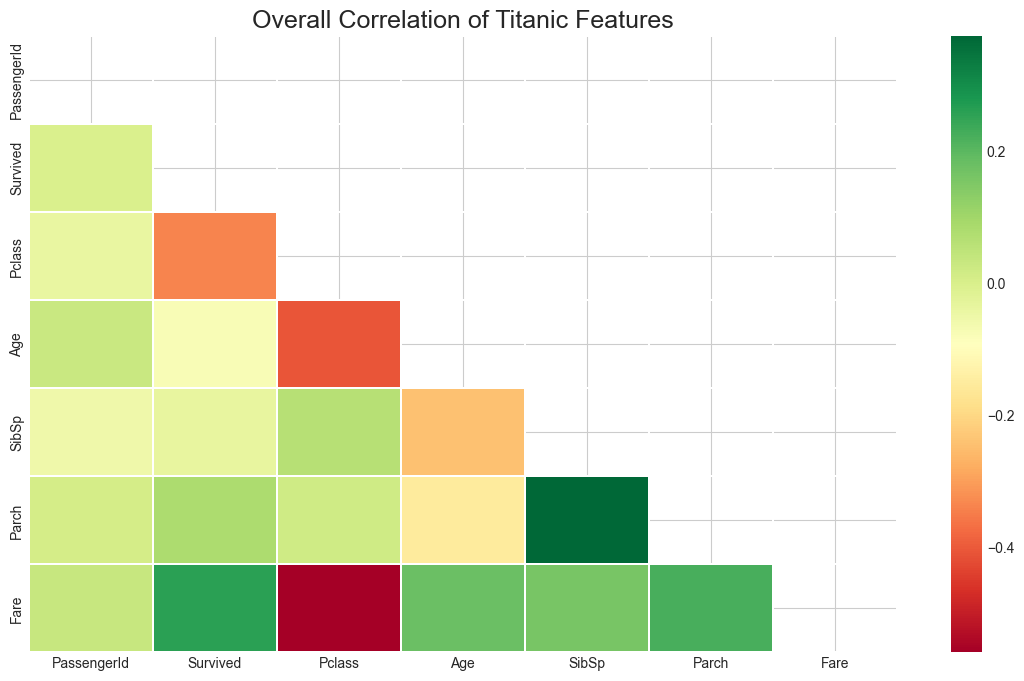

In [19]:
# Co-relation matrix
corr = data.corr(numeric_only=True)
# setup mask
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# setup graph
plt.figure(figsize=(14, 8))
# set graph title
plt.title('Overall Correlation of Titanic Features', fontsize=18)
# plot Co-relation matrix
sns.heatmap(corr, mask=mask, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

* [seaborn heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

* [pandas corr matrix](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)  

* [searbon corr heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)


* `Surived` 분석

`Survived` - Key: (`0` - Not Survived, `1` - Survived)
Although Survived gives a value in numbers, it's essentially a Categorical Variable.

Survived
0    549
1    342
Name: count, dtype: int64


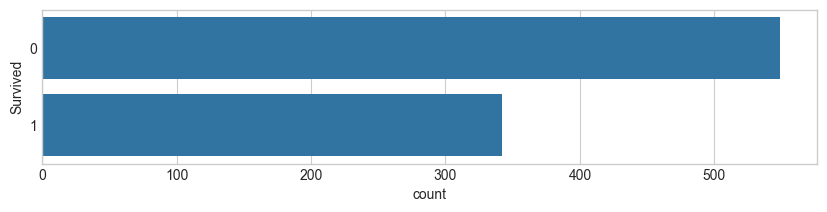

In [20]:
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Survived', data=train)
print(train.Survived.value_counts())

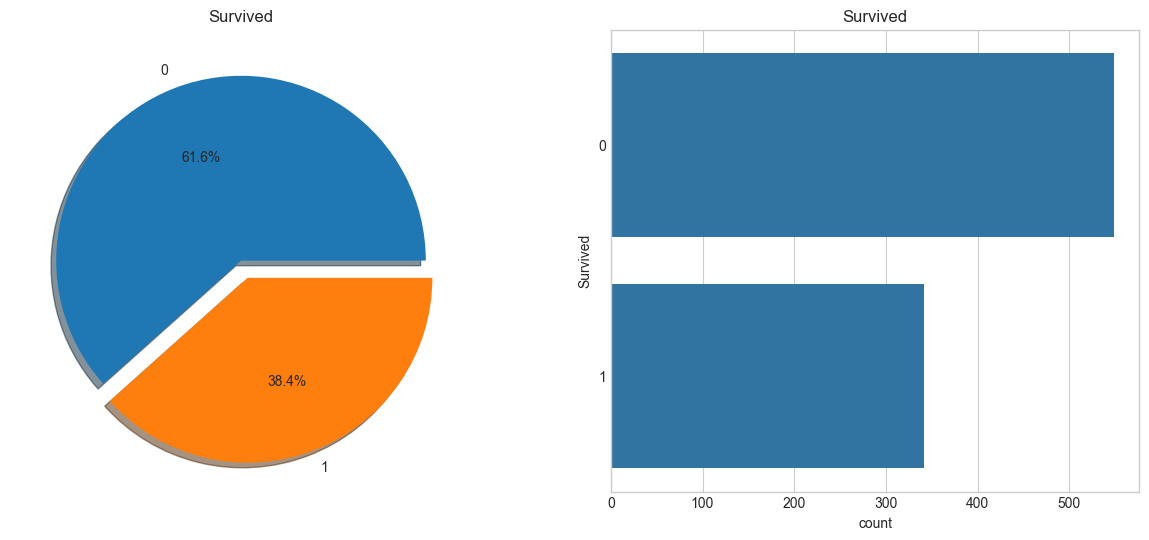

In [21]:
f,ax=plt.subplots(1, 2, figsize=(15, 6))
train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(y='Survived',data=train, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

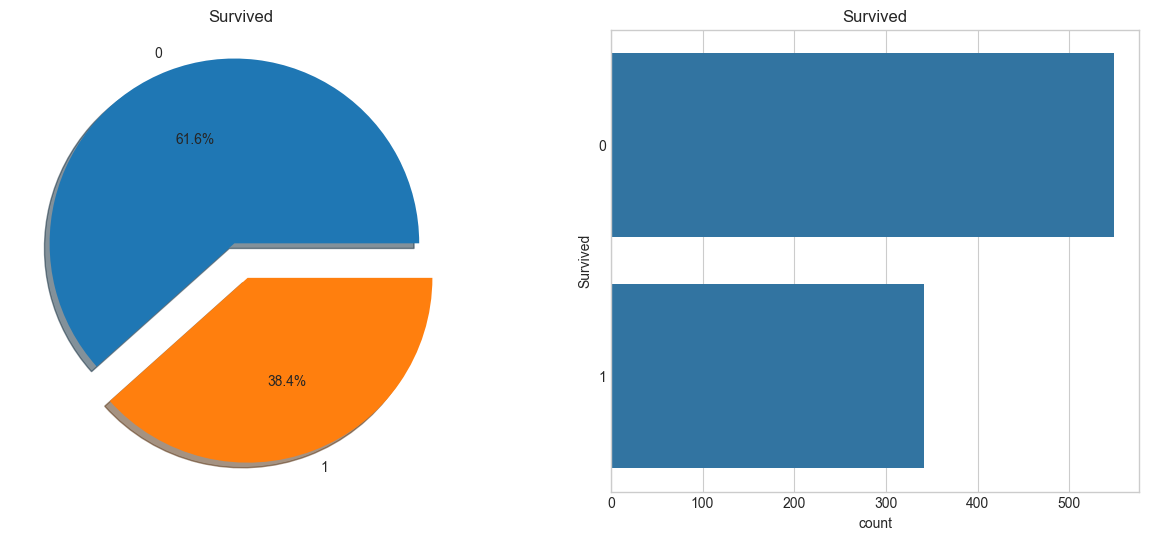

In [22]:
def piecount(col):
    f, ax = plt.subplots(1, 2, figsize=(15, 6))
    train[col].value_counts().plot.pie(explode=[0.1 for i in range(train[col].nunique())], autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_title(col)
    ax[0].set_ylabel('')
    sns.countplot(y=col, data=train, ax=ax[1])
    ax[1].set_title(col)
    plt.show()

piecount('Survived')

* `Pclass` Analysis

* `Pclass` is Ordinal Feature.
* Key:`1` = 1st, `2`= 2nd, `3` = 3rd

In [23]:
train.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [24]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


* People in first-class cabins have more survivors, second-class has slightly more deaths than survivors, and third-class has more than three times the deaths, as can be seen.

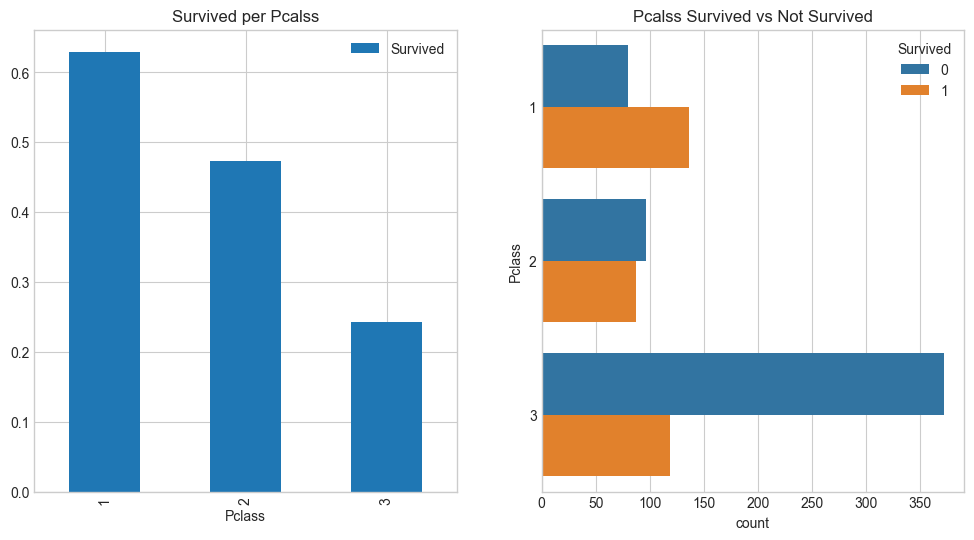

In [25]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived per Pcalss')
sns.countplot(y='Pclass', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Pcalss Survived vs Not Survived')
plt.show()

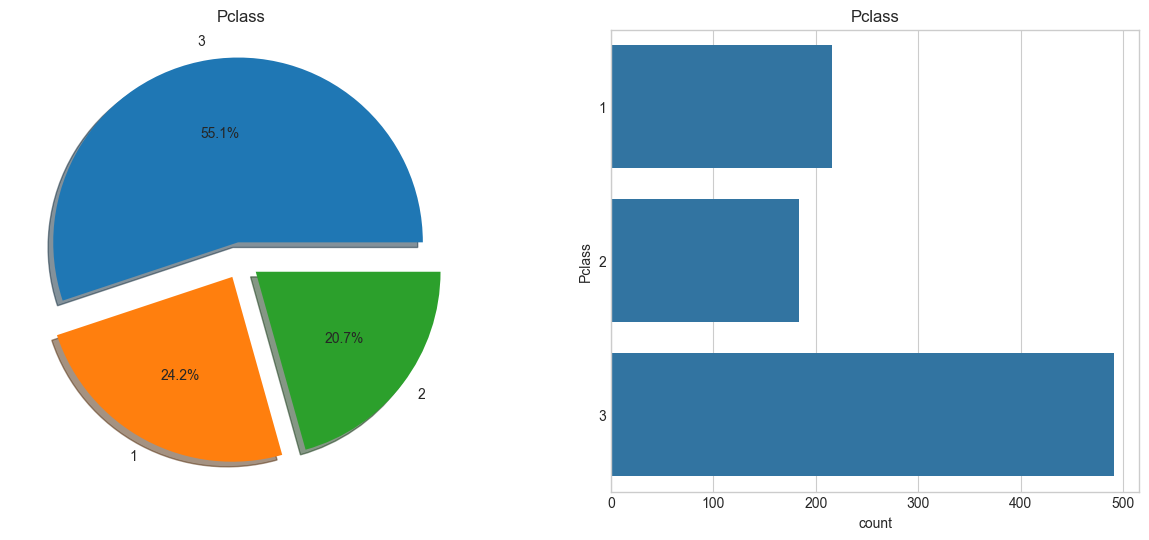

In [26]:
piecount("Pclass")

- `Name`Analysis

- It's highly likely that almost all names will be different. Considering Family Name, First Name, Middle Name and even Dr. Capt, master and so on...
- Let's try to categorize them.

In [27]:
data.Name.value_counts()

Name
Connolly, Miss. Kate                                   2
Kelly, Mr. James                                       2
Braund, Mr. Owen Harris                                1
Johnson, Master. Harold Theodor                        1
Gustafsson, Mr. Alfred Ossian                          1
                                                      ..
Carter, Miss. Lucile Polk                              1
Silvey, Mr. William Baird                              1
Kallio, Mr. Nikolai Erland                             1
Louch, Mrs. Charles Alexander (Alice Adelaide Slow)    1
Peter, Master. Michael J                               1
Name: count, Length: 1307, dtype: int64

- I can't get a sense of the name at first glance. Should we look at the title like Mr. in the middle?
- Create a new column called `['Initial']` and put the Regular Expression extracted from Name here.

In [28]:
temp = data.copy()
temp['Initial'] = 0
temp['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [29]:
temp['Initial'].value_counts()

Initial
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [30]:
pd.crosstab(temp.Initial, temp.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [31]:
def survpct(col):
    return temp.groupby(col)['Survived'].mean()

survpct('Initial')

Initial
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dona             NaN
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

- `Ms.` is not a combination of `Miss` + `Mrs` as in modern times, but it meant a noble **maiden** at the time. `Mlle` and `Mme` are likely to be abbreviations for **Mademoiselle** and **Madame**. They must be seen as **noble women**.

In [32]:
temp['LastName'] = data.Name.str.extract('([A-Za-z]+)')

In [33]:
pd.crosstab(temp.LastName, temp.Survived).T.style.background_gradient(cmap='summer_r')

- Now, we have extracted titles such as Mr. from Initial, and extracted the surname.
- The machine prefers numbers over alphabets, so we change it to numbers.
- Before that, we have to deal with Dona.

In [34]:
temp.loc[temp['Initial'] == 'Dona']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,Dona,Oliva


- I put `Mrs.` based on age.
- There are many ways to handle missing values, but in such a case, it's okay to use the most appropriate guess.

In [35]:
temp.loc[temp['Initial'] == 'Dona', 'Initial'] = 'Mrs'

In [36]:
pd.crosstab(temp.Initial, temp.Survived).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Survived,,,,,,,,,,,,,,,,,
0.000000,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0
1.000000,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1


* Convert Last name to numeric

In [37]:
temp['NumName'] = temp['LastName'].factorize()[0]

In [38]:
temp[['LastName', 'NumName']].tail(3)

,LastName,NumName
415,Saether,852
416,Ware,799
417,Peter,116


In [39]:
pd.crosstab(temp.NumName, temp.Survived).T.style.background_gradient(cmap='summer_r')

NumName,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651
Survived,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000000,2,0,0,1,1,2,1,4,3,1,0,0,1,7,1,0,5,4,4,0,1,0,0,0,1,1,2,5,1,1,0,0,1,2,1,0,1,0,1,2,1,1,0,1,1,1,2,6,1,1,0,1,0,0,1,1,6,1,0,2,6,1,0,0,1,1,1,1,1,0,1,1,1,0,0,1,0,0,1,0,1,4,1,1,1,1,1,1,1,1,1,0,0,1,1,2,2,3,4,1,0,0,1,1,2,1,2,2,1,1,1,3,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,3,0,1,1,1,1,1,1,1,1,1,2,3,0,1,1,7,1,0,1,2,1,0,1,1,4,1,3,1,4,1,1,1,1,0,1,0,3,1,0,1,0,1,0,1,0,1,2,1,1,0,2,0,0,0,2,0,1,1,1,1,0,1,0,0,1,1,1,1,1,0,1,1,2,1,1,1,1,1,1,1,0,1,1,1,1,0,0,2,1,1,2,2,0,0,0,0,0,1,1,1,1,0,1,0,1,0,0,1,0,1,1,1,1,1,2,1,0,1,1,0,0,0,0,1,1,1,1,1,2,0,1,0,1,0,1,1,0,0,0,1,1,2,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,1,1,1,0,0,1,1,3,1,1,0,1,0,0,1,2,1,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,2,0,1,0,0,1,1,0,0,1,2,1,1,0,1,1,1,0,1,0,0,1,1,1,1,2,1,0,0,2,0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,2,1,0,1,0,1,0,0,0,2,1,1,1,1,1,1,1,1,2,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,2,1,1,0,0,0,0,0,0,0,

In [40]:
temp.loc[temp['LastName'] == 'Ali']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName
210,211,0.0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.05,NaN,S,Mr,Ali,182
784,785,0.0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.05,NaN,S,Mr,Ali,182


- `Sex` Analysis

In [41]:
train[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


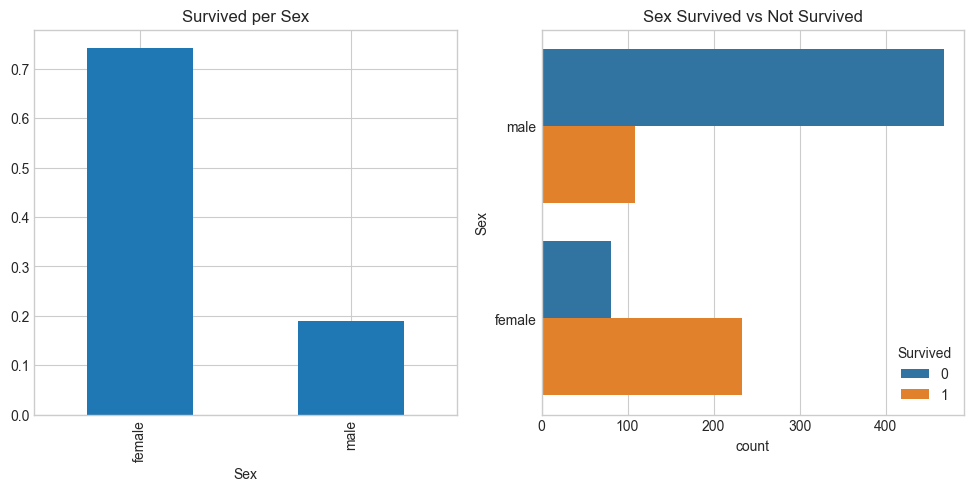

In [42]:
def bag(col, target, title, title1):
    f,ax=plt.subplots(1,2,figsize=(12,5))
    train.groupby([col])[target].mean().plot(kind='bar', ax=ax[0])
    ax[0].set_title(title)
    sns.countplot(y=col, hue=target, data=train, ax=ax[1])
    ax[1].set_title(title1)
    plt.show()
    
bag('Sex','Survived','Survived per Sex','Sex Survived vs Not Survived')

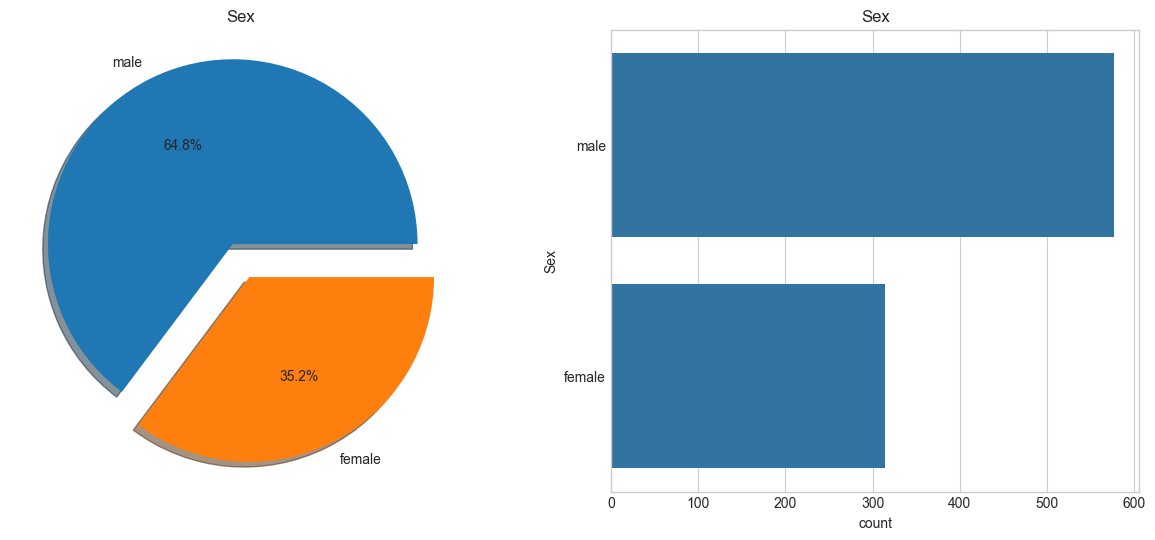

In [43]:
piecount('Sex')

- The number of men on board was much greater than the number of women. However, the number of women survived is almost twice the number of men survived.
- The survival rate of women on the ship is about 75%, while the survival rate of men is about 18 ~ 19 %
- At first glance, it seems obvious to divide men/women into 1 and 2, but it would be better to further refine it.
- For example, babies are just babies, and wouldn't be asked if they were boys or girls when being put on lifeboats.
- Rather (unfortunately), whether the baby is a noble or a commoner could determine their luck or misfortune.

In [44]:
pd.crosstab([train.Sex, train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

- Even though society was unfair, it could be said that at least the gentlemen's manners of men existed.

- `Age` Analysis

- `Age` is a continuous value.
- **There are many blanks, so handling these will likely play a crucial role.**
- We will look at the maximum, minimum, and median of Age.

In [45]:
print('Oldest Passenger was', data['Age'].max(), 'Years')
print('Youngest Passenger was', data['Age'].min(), 'Years')
print('Average Age on the ship was', int(data['Age'].mean()), 'Years')

Oldest Passenger was 80.0 Years
Youngest Passenger was 0.17 Years
Average Age on the ship was 29 Years


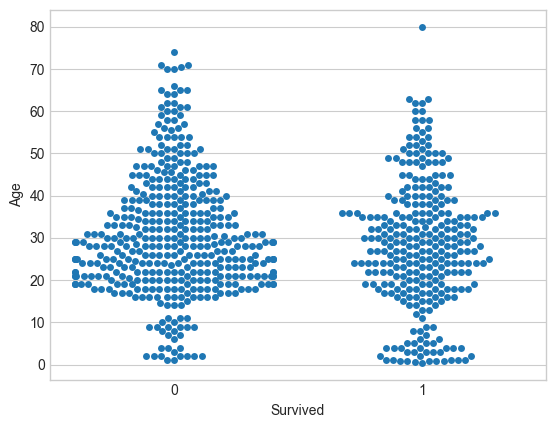

In [46]:
sns.swarmplot(x=train['Survived'], y=train['Age'])
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

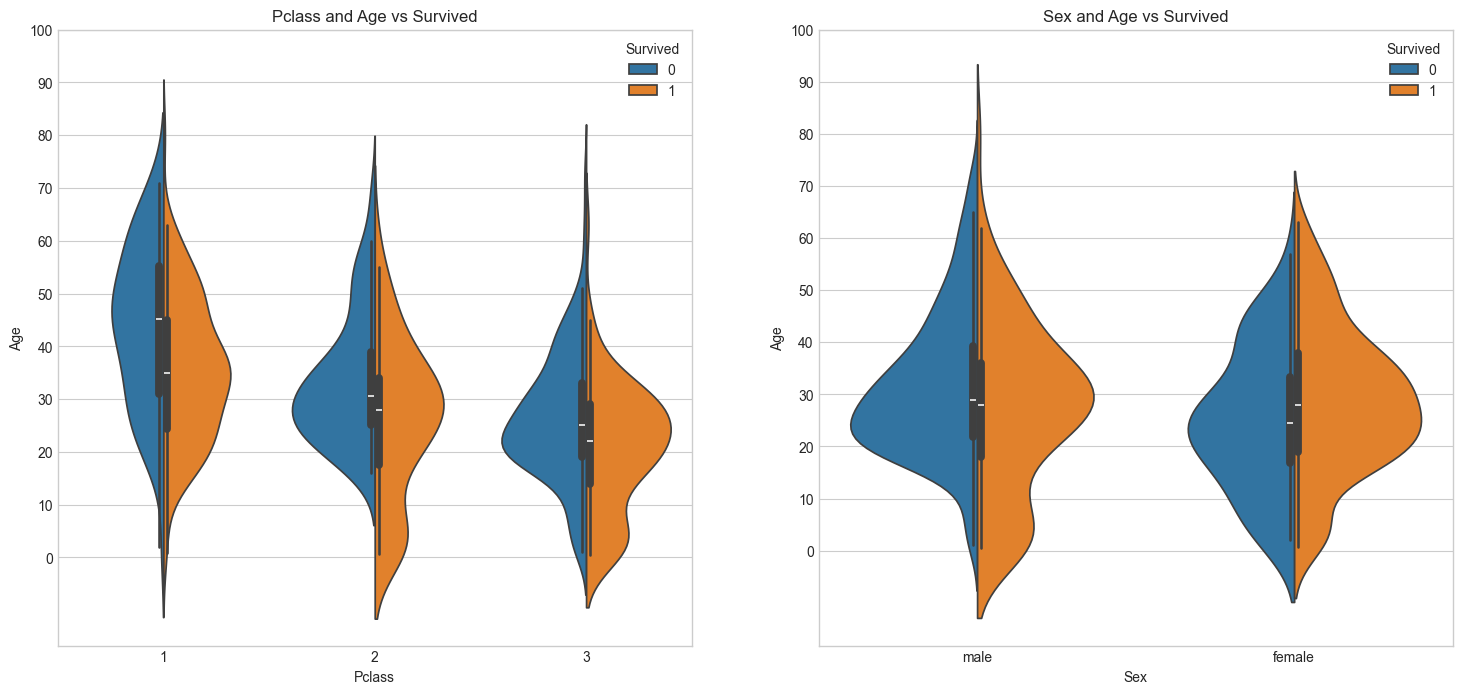

In [47]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

Observations:

1) The number of children increases according to `Pclass` and the survival rate of children under 10 (i.e., children) seems good regardless of `Pclass`.

2) The survival chances of Passengers aged **20-50** from `Pclass1` are high and even better for `women`.

3) For `men`, **the chances of survival decrease as age increases.**

- First, we will address the missing values in `Age`.

- As we saw earlier, there are **177 null** values in the `Age` category. We could assign the average lifespan of the dataset to these `NaN` values.

- However, the problem is that the average age of 29 cannot be assigned to a 4-year-old child. Is there a way to know what age group the passenger is in? **Let's look for a hint in the name.**

- And it seems good to apply the average age per `Initial` to `Age`.

In [48]:
temp.groupby('Initial').agg({'Age': ['mean', 'count']}) #Initial 별 평균 연령 체크

Age      
               mean count
Initial                  
Capt      70.000000     1
Col       54.000000     4
Countess  33.000000     1
Don       40.000000     1
Dr        43.571429     7
Jonkheer  38.000000     1
Lady      48.000000     1
Major     48.500000     2
Master     5.482642    53
Miss      21.774238   210
Mlle      24.000000     2
Mme       24.000000     1
Mr        32.252151   581
Mrs       37.005848   171
Ms        28.000000     1
Rev       41.250000     8
Sir       49.000000     1

In [49]:
temp = temp.reset_index(drop=True)
temp['Age'] = temp.groupby('Initial')['Age'].apply(lambda x: x.fillna(x.mean())).reset_index(level=0, drop=True)

temp[31:50]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,37.005848,1,0,PC 17569,146.5208,B78,C,Mrs,Spencer,30
32,33,1.0,3,"Glynn, Miss. Mary Agatha",female,21.774238,0,0,335677,7.7500,NaN,Q,Miss,Glynn,31
33,34,0.0,2,"Wheadon, Mr. Edward H",male,66.000000,0,0,C.A. 24579,10.5000,NaN,S,Mr,Wheadon,32
34,35,0.0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,NaN,C,Mr,Meyer,33
35,36,0.0,1,"Holverson, Mr. Alexander Oskar",male,42.000000,1,0,113789,52.0000,NaN,S,Mr,Holverson,34
36,37,1.0,3,"Mamee, Mr. Hanna",male,32.252151,0,0,2677,7.2292,NaN,C,Mr,Mamee,35
37,38,0.0,3,"Cann, Mr. Ernest Charles",male,21.000000,0,0,A./5. 2152,8.0500,NaN,S,Mr,Cann,36
38,39,0.0,3,"Vander Planke, Miss. Augusta Maria",female,18.000000,2,0,345764,18.0000,NaN,S,Miss,Vander,18
39,40,1.0,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,NaN,C,Miss,Nicola,37
40,41,0.0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.000000,1,0,7546,9.4750,NaN,S,Mrs,Ahlin,38




- Now, let's organize the `Initial` a bit.

In [50]:
temp['Initial'].replace([
    'Capt',
    'Col',
    'Countess',
    'Don',
    'Dona',
    'Dr',
    'Jonkheer',
    'Lady',
    'Major',
    'Master',
    'Miss',
    'Mlle',
    'Mme',
    'Mr',
    'Mrs',
    'Ms',
    'Rev',
    'Sir'], ['Sacrificed', 'Respected', 'Nobles', 'Mr', 'Mrs', 'Respected', 'Mr', 'Nobles', 'Respected', 'Kids', 'Miss', 'Nobles', 'Nobles', 'Mr', 'Mrs', 'Nobles', 'Sacrificed', 'Nobles'],inplace=True)
temp['Initial'].replace(['Kids', 'Miss', 'Mr', 'Mrs', 'Nobles', 'Respected', 'Sacrificed'], [4, 4, 2, 5, 6, 3, 1], inplace=True)

In [51]:
temp['Age_Range'] = pd.qcut(temp['Age'], 10)

In [52]:
survpct('Age_Range')

Age_Range
(0.169, 16.0]     0.548077
(16.0, 21.0]      0.307692
(21.0, 23.0]      0.487179
(23.0, 26.0]      0.369863
(26.0, 30.0]      0.400000
(30.0, 32.252]    0.198718
(32.252, 33.0]    0.411765
(33.0, 39.0]      0.504762
(39.0, 48.0]      0.357143
(48.0, 80.0]      0.387500
Name: Survived, dtype: float64

In [53]:
temp['Agroup'] = 0

temp.loc[temp['Age'] < 1.0, 'Agroup'] = 1
temp.loc[(temp['Age'] >=1.0) & (temp['Age'] <= 3.0), 'Agroup'] = 2
temp.loc[(temp['Age'] > 3.0) & (temp['Age'] < 11.0), 'Agroup'] = 7
temp.loc[(temp['Age'] >= 11.0) & (temp['Age'] < 15.0), 'Agroup'] = 13
temp.loc[(temp['Age'] >= 15.0) & (temp['Age'] < 18.0), 'Agroup'] = 16
temp.loc[(temp['Age'] >= 18.0) & (temp['Age'] <=  20.0), 'Agroup'] = 18
temp.loc[(temp['Age'] > 20.0) & (temp['Age'] <= 22.0), 'Agroup'] = 21
temp.loc[(temp['Age'] > 22.0) & (temp['Age'] <= 26.0), 'Agroup'] = 24
temp.loc[(temp['Age'] > 26.0) & (temp['Age'] <= 30.0), 'Agroup'] = 28
temp.loc[(temp['Age'] > 30.0) & (temp['Age'] <= 32.0), 'Agroup'] = 31
temp.loc[(temp['Age'] > 32.0) & (temp['Age'] <= 34.0), 'Agroup'] = 33
temp.loc[(temp['Age'] > 34.0) & (temp['Age'] <= 38.0), 'Agroup'] = 36
temp.loc[(temp['Age'] > 38.0) & (temp['Age'] <= 52.0), 'Agroup'] = 45
temp.loc[(temp['Age'] > 52.0) & (temp['Age'] <= 75.0), 'Agroup'] = 60
temp.loc[temp['Age'] > 75.0, 'Agroup'] = 78

In [54]:
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0,"(21.0, 23.0]",21
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5,Cumings,1,"(33.0, 39.0]",36
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2,"(23.0, 26.0]",24
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5,Futrelle,3,"(33.0, 39.0]",36
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,Allen,4,"(33.0, 39.0]",36


* I will divide the gender into male, female, and babies under 1 year old. I will assign numbers 1, 2, and 3.

In [55]:
temp.loc[(temp['Sex'] == 'male'), 'Sex'] = 1
temp.loc[(temp['Sex'] == 'female'), 'Sex'] = 2
temp.loc[(temp['Age'] < 1), 'Sex'] = 3

In [56]:
survpct('Sex')

Sex
1    0.181818
2    0.740385
3    1.000000
Name: Survived, dtype: float64

#### Family or Alone?
- Analysis of `"SibSp"` + `"Parch"`
- `SibSp` - This item indicates whether the passenger is alone or with family.
- `Sibling` = brother, sister, stepbrother, stepsister
- `Spouse` = husband, wife
- `Parch` looks at whether they traveled with parents.
- Divide these two groups into `'Alone'` group and `'Family'` group.

In [57]:
temp.loc[(temp['SibSp'] == 0) & (temp['Parch'] == 0), 'Alone'] = 1

In [58]:
temp['Family'] = temp['Parch'] + temp['SibSp'] + 1

In [59]:
temp.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0,"(21.0, 23.0]",21,NaN,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.000000,1,0,PC 17599,71.2833,C85,C,5,Cumings,1,"(33.0, 39.0]",36,NaN,2
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.000000,1,0,113803,53.1000,C123,S,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,2,Allen,4,"(33.0, 39.0]",36,1.0,1
5,6,0.0,3,"Moran, Mr. James",1,32.252151,0,0,330877,8.4583,NaN,Q,2,Moran,5,"(30.0, 32.252]",33,1.0,1
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S,2,McCarthy,6,"(48.0, 80.0]",60,1.0,1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S,4,Palsson,7,"(0.169, 16.0]",2,NaN,5
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.000000,0,2,347742,11.1333,NaN,S,5,Johnson,8,"(26.0, 30.0]",28,NaN,3
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.000000,1,0,237736,30.0708,NaN,C,5,Nasser,9,"(0.169, 16.0]",13,NaN,2


In [60]:
survpct('Family')

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

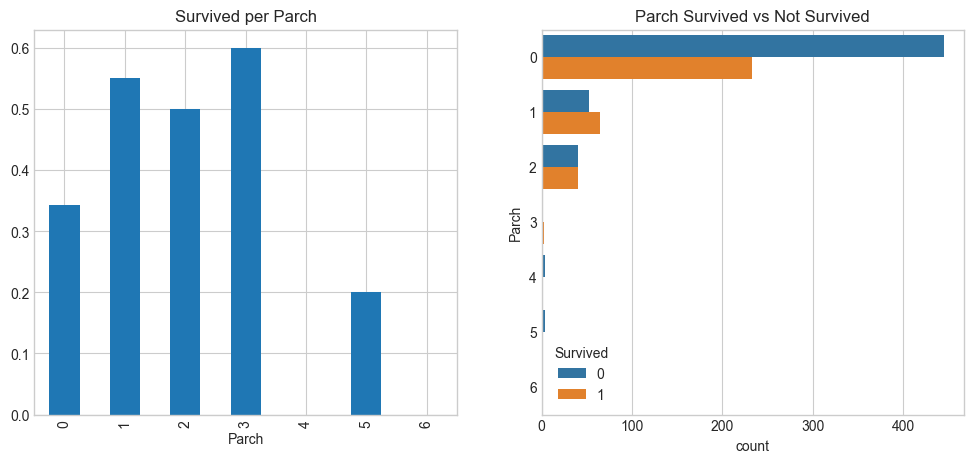

In [61]:
bag('Parch', 'Survived', 'Survived per Parch', 'Parch Survived vs Not Survived')

In [62]:
pd.crosstab([temp.Family, temp.Survived], temp.Pclass, margins=True).style.background_gradient(cmap='summer_r')

- The cross tab shows that `Pclass3`is where families reside.
- The results here are very similar too. Passengers who boarded with parents have a higher chance of survival. However, the chances decrease as the number rises.
- The chances of survival are good for someone with 1-3 parents on the ship. Being alone also results in lower chances of survival and if you have a family of 4 or more, the chances of survival decrease. This shows the tragic situation at the time where the noble class with a small number of families survived, the many young people who were alone had no choice but to give up, and for people with many family members (especially non-noble third-class people), if not everyone could board, no one could.

#### `"Ticket"` Analysis

In [63]:
temp.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [64]:
temp.Ticket.isnull().any()

False

* Let's take a look at the tickets with English and numbers only.

In [65]:
temp['Initick'] = temp.Ticket.str.extract('^([A-Za-z0-9]+)')

temp = temp.reset_index(drop=True)

temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0,"(21.0, 23.0]",21,NaN,2,A
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,5,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2,113803
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,2,Allen,4,"(33.0, 39.0]",36,1.0,1,373450


In [66]:
temp['Initick'] = temp.Ticket.str.extract('^([A-Za-z]+)')

In [67]:
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0,"(21.0, 23.0]",21,NaN,2,A
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,5,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2,NaN
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,2,Allen,4,"(33.0, 39.0]",36,1.0,1,NaN


In [68]:
temp['NumTicket'] = temp['Initick'].factorize()[0]

In [69]:
temp.head(n=15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,...,S,2,Braund,0,"(21.0, 23.0]",21,NaN,2,A,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.000000,1,0,PC 17599,71.2833,...,C,5,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC,1
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.000000,0,0,STON/O2. 3101282,7.9250,...,S,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.000000,1,0,113803,53.1000,...,S,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2,NaN,-1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,...,S,2,Allen,4,"(33.0, 39.0]",36,1.0,1,NaN,-1
5,6,0.0,3,"Moran, Mr. James",1,32.252151,0,0,330877,8.4583,...,Q,2,Moran,5,"(30.0, 32.252]",33,1.0,1,NaN,-1
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,...,S,2,McCarthy,6,"(48.0, 80.0]",60,1.0,1,NaN,-1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,...,S,4,Palsson,7,"(0.169, 16.0]",2,NaN,5,NaN,-1
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.000000,0,2,347742,11.1333,...,S,5,Johnson,8,"(26.0, 30.0]",28,NaN,3,NaN,-1
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.000000,1,0,237736,30.0708,...,C,5,Nasser,9,"(0.169, 16.0]",13,NaN,2,NaN,-1


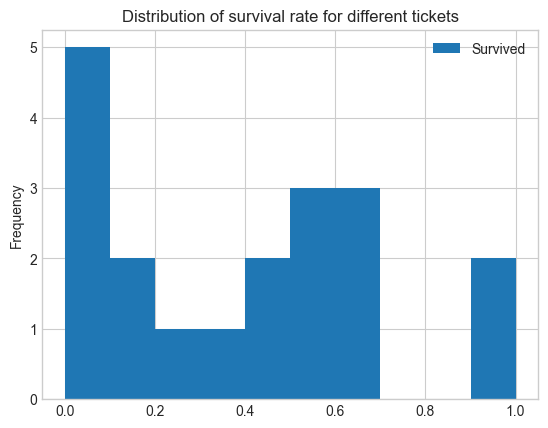

In [70]:
temp.groupby('NumTicket')['Survived'].mean().to_frame().plot(kind='hist')
plt.title('Distribution of survival rate for different tickets');

### "Fare" Analysis

In [71]:
print('Highest Fare was:', temp['Fare'].max())
print('Lowest Fare was:', temp['Fare'].min())
print('Average Fare was:', temp['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 33.29547928134557


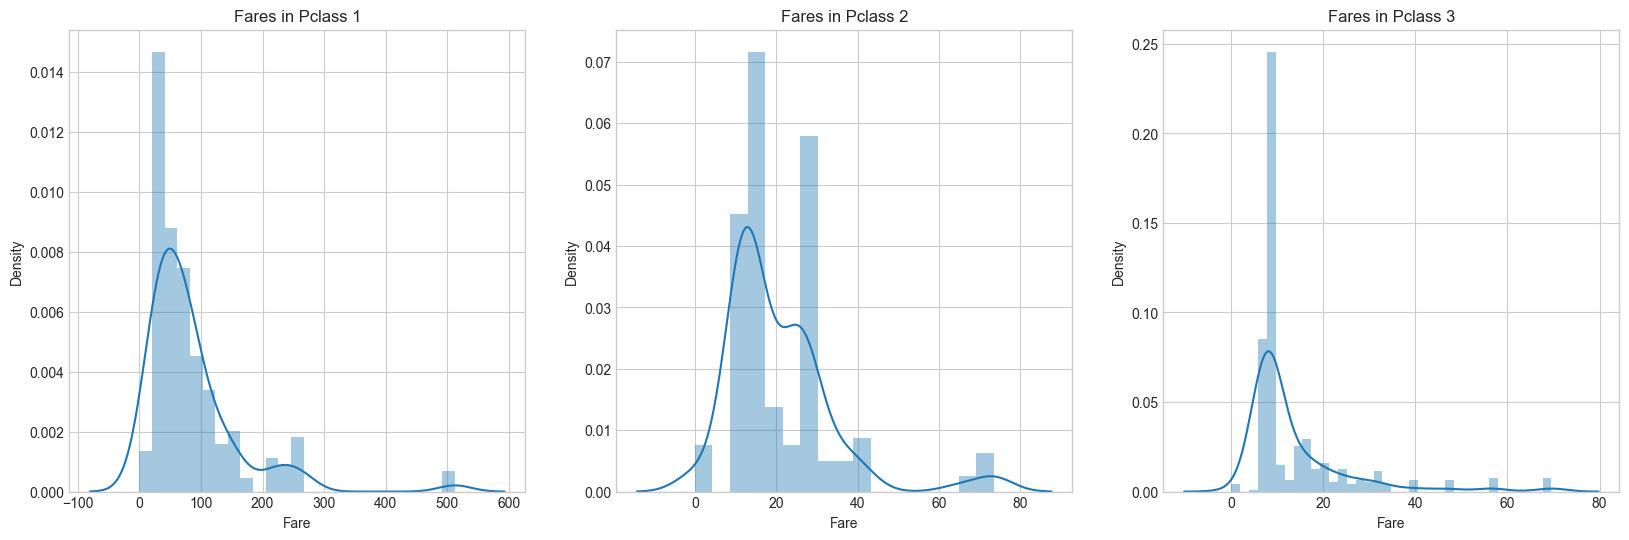

In [72]:
f,ax=plt.subplots(1, 3, figsize=(20, 6))
sns.distplot(train[train['Pclass'] == 1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train[train['Pclass'] == 2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train[train['Pclass'] == 3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

- It appears that there is a large distribution in the fares of Pclass1 passengers, which could be transformed into discrete values.
- I will divide the Fare into groups.
- By using `qcut`, you can divide the data into the pieces you want. (`cut` vs `qcut`)

In [73]:
def groupmean(a,b):
    return temp.groupby([a])[b].mean().to_frame().style.background_gradient(cmap='summer_r')

temp['Fare_Range'] = pd.qcut(train['Fare'], 10)
groupmean('Fare_Range', 'Fare')

,Fare
Fare_Range,
"(-0.001, 7.55]",5.928717
"(7.55, 7.854]",7.768490
"(7.854, 8.05]",7.963669
"(8.05, 10.5]",9.521367
"(10.5, 14.454]",12.940231
"(14.454, 21.679]",17.386408
"(21.679, 27.0]",25.487501
"(27.0, 39.688]",32.282186
"(39.688, 77.958]",59.444572


* We will group the Fare. We will name it `Fgroup`.

0 and below -> 0

7.125 and below-> 5.0

7.9 and below-> 7.5

8.03 or less-> 8.0

Less than 10.5-> 9.5

Less than 23-> 16.0

27.8 and below-> 25.5

51 and below-> 38

73.5 and below-> 62

Over 73.5-> 100

In [74]:
temp['Fgroup'] = 0

temp.loc[temp['Fare'] <= 0,'Fgroup'] = 0
temp.loc[(temp['Fare'] > 0) & (temp['Fare'] <= 7.125), 'Fgroup'] = 1
temp.loc[(temp['Fare'] > 7.125) & (temp['Fare'] <= 7.9), 'Fgroup'] = 2
temp.loc[(temp['Fare'] > 7.9) & (temp['Fare'] <= 8.03), 'Fgroup'] = 3
temp.loc[(temp['Fare'] > 8.03) & (temp['Fare'] < 10.5), 'Fgroup'] = 4
temp.loc[(temp['Fare'] >= 10.5) & (temp['Fare'] < 23.0), 'Fgroup'] = 5
temp.loc[(temp['Fare'] >= 23.0) & (temp['Fare'] <= 27.8), 'Fgroup'] = 6
temp.loc[(temp['Fare'] > 27.8) & (temp['Fare'] <= 51.0), 'Fgroup'] = 7
temp.loc[(temp['Fare'] > 51.0) & (temp['Fare'] <= 73.5), 'Fgroup'] = 8
temp.loc[temp['Fare'] > 73.5, 'Fgroup'] = 9

temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,Braund,0,"(21.0, 23.0]",21,NaN,2,A,0,"(-0.001, 7.55]",2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,...,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC,1,"(39.688, 77.958]",8
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,...,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON,2,"(7.854, 8.05]",3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,...,Futrelle,3,"(33.0, 39.0]",36,NaN,2,NaN,-1,"(39.688, 77.958]",8
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,Allen,4,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(7.854, 8.05]",4


### `"Cabin"` Analysis

- We will see if there are any differences depending on the location of the cabin.

In [75]:
temp.Cabin.value_counts().head(10)

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
F2                 4
B96 B98            4
C78                4
F4                 4
D                  4
Name: count, dtype: int64

In [76]:
temp.Cabin.isnull().sum()

1014

- There are quite a lot of blanks.
- There are many things empty in the Cabin, so I will classify it as a different category for now and classify the existing ones as initials.
- I'm trying to distinguish the empty ones with X, but this seems to be linked with Pclass 1,2,3, so if it's empty and 1st class, it's X, 2nd class is Y, 3rd class is Z.

In [77]:
temp['Inicab'] = 0
temp['Inicab'] = temp['Cabin'].str.extract('^([A-Za-z]+)')
temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 1)), 'Inicab'] = 'X'
temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 2)), 'Inicab'] = 'Y'
temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 3)), 'Inicab'] = 'Z'

temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,"(21.0, 23.0]",21,NaN,2,A,0,"(-0.001, 7.55]",2,Z
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,...,1,"(33.0, 39.0]",36,NaN,2,PC,1,"(39.688, 77.958]",8,C
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,...,2,"(23.0, 26.0]",24,1.0,1,STON,2,"(7.854, 8.05]",3,Z
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,...,3,"(33.0, 39.0]",36,NaN,2,NaN,-1,"(39.688, 77.958]",8,C
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,4,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(7.854, 8.05]",4,Z


In [78]:
temp['Inicab'] = temp['Inicab'].factorize()[0]

temp[11:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
11,12,1.0,1,"Bonnell, Miss. Elizabeth",2,58.000000,0,0,113783,26.5500,...,11,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(21.679, 27.0]",6,1
12,13,0.0,3,"Saundercock, Mr. William Henry",1,20.000000,0,0,A/5. 2151,8.0500,...,12,"(16.0, 21.0]",18,1.0,1,A,0,"(7.854, 8.05]",4,0
13,14,0.0,3,"Andersson, Mr. Anders Johan",1,39.000000,1,5,347082,31.2750,...,13,"(33.0, 39.0]",45,NaN,7,NaN,-1,"(27.0, 39.688]",7,0
14,15,0.0,3,"Vestrom, Miss. Hulda Amanda Adolfina",2,14.000000,0,0,350406,7.8542,...,14,"(0.169, 16.0]",13,1.0,1,NaN,-1,"(7.55, 7.854]",2,0
15,16,1.0,2,"Hewlett, Mrs. (Mary D Kingcome)",2,55.000000,0,0,248706,16.0000,...,15,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(14.454, 21.679]",5,3
16,17,0.0,3,"Rice, Master. Eugene",1,2.000000,4,1,382652,29.1250,...,16,"(0.169, 16.0]",2,NaN,6,NaN,-1,"(27.0, 39.688]",7,0
17,18,1.0,2,"Williams, Mr. Charles Eugene",1,32.252151,0,0,244373,13.0000,...,17,"(30.0, 32.252]",33,1.0,1,NaN,-1,"(10.5, 14.454]",5,3
18,19,0.0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",2,31.000000,1,0,345763,18.0000,...,18,"(30.0, 32.252]",31,NaN,2,NaN,-1,"(14.454, 21.679]",5,0
19,20,1.0,3,"Masselmani, Mrs. Fatima",2,37.005848,0,0,2649,7.2250,...,19,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(-0.001, 7.55]",2,0


#### `"Embarked"` Analysis

In [79]:
pd.crosstab([temp.Embarked, temp.Pclass], [temp.Sex, temp.Survived], margins=True).style.background_gradient(cmap='summer_r')

* Survival probability by boarding location

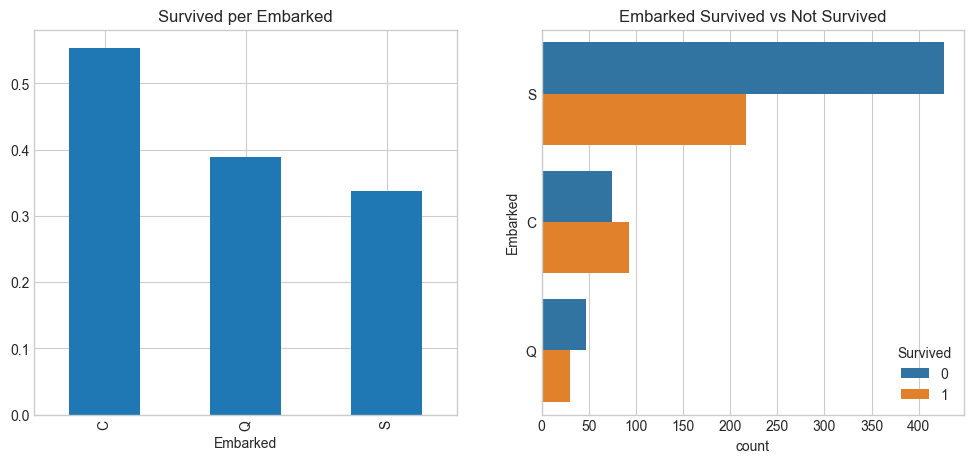

In [80]:
bag('Embarked', 'Survived', 'Survived per Embarked', 'Embarked Survived vs Not Survived')

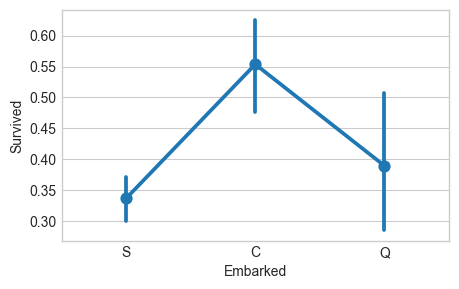

In [81]:
sns.pointplot(data=temp, x='Embarked', y='Survived')
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

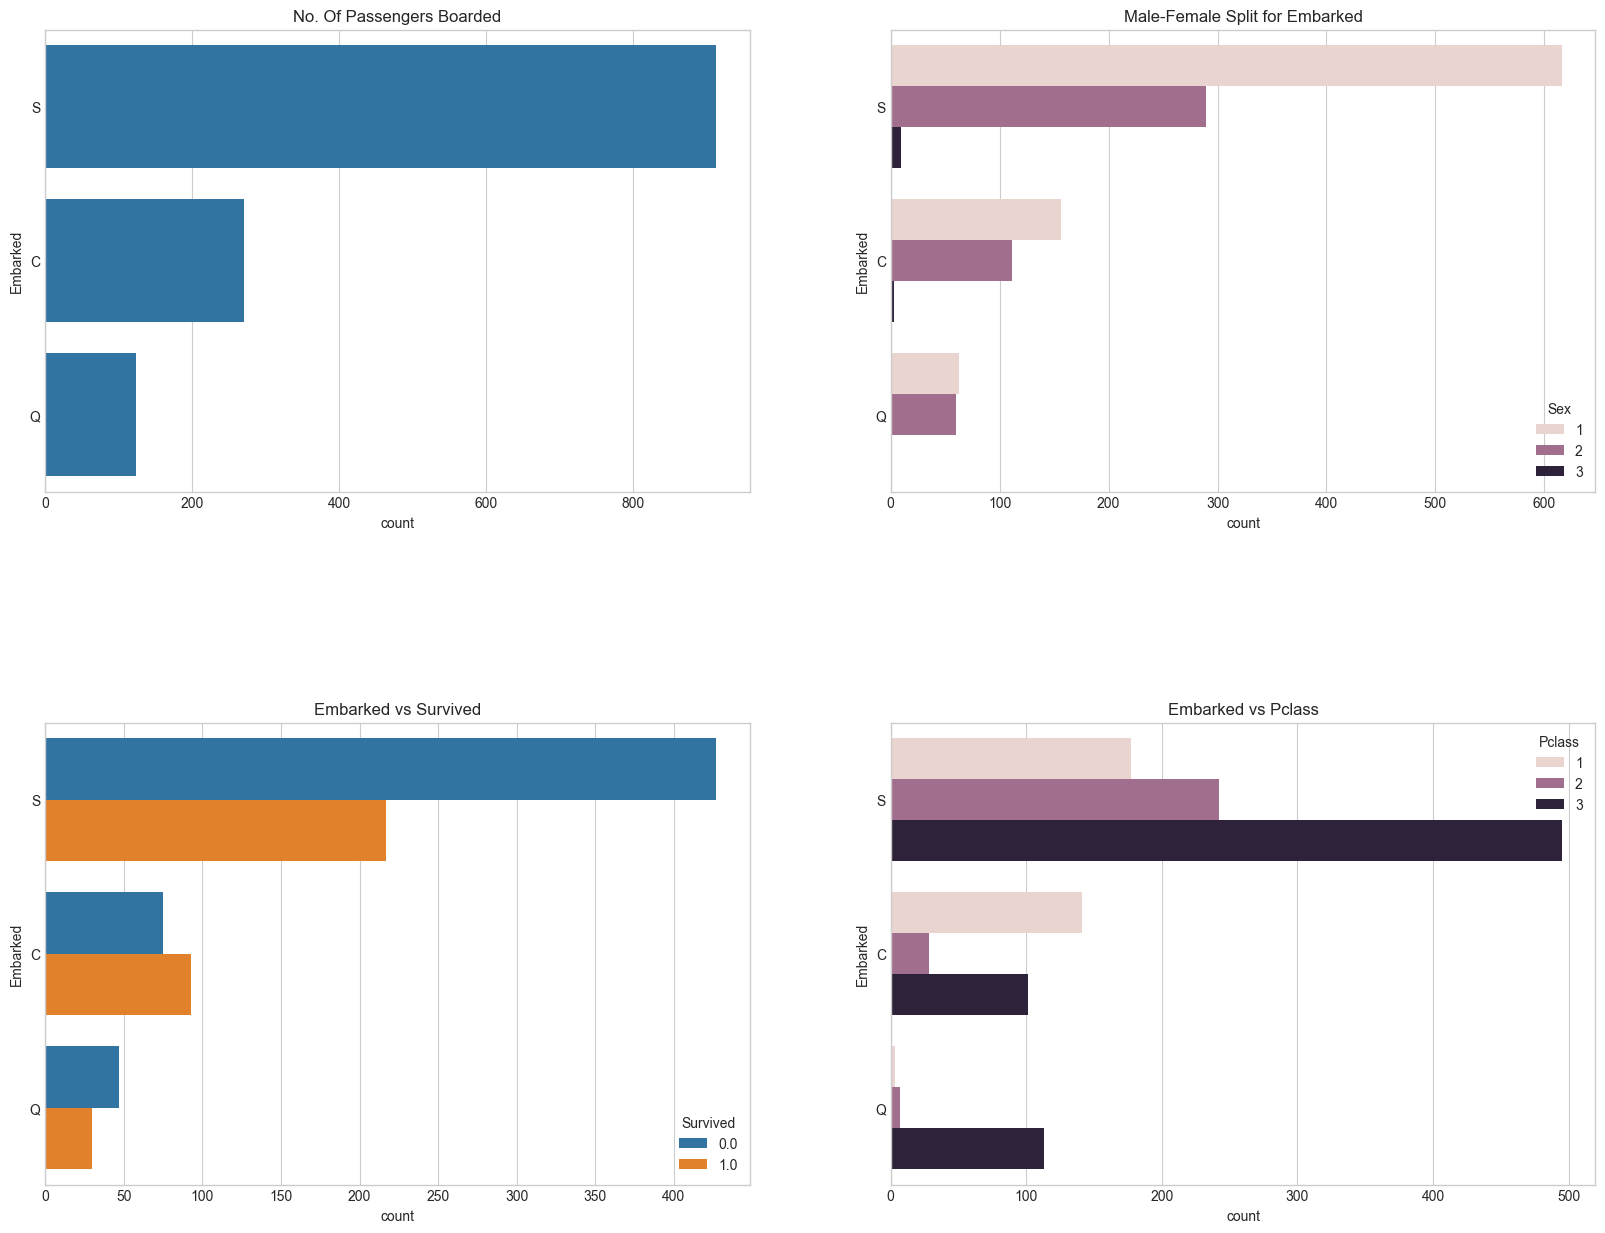

In [82]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(y='Embarked', data=temp, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(y='Embarked', hue='Sex', data=temp, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(y='Embarked', hue='Survived', data=temp, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(y='Embarked', hue='Pclass', data=temp, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

1. The survival rate for port `C` is about 0.55, and the lowest is `S`. `S` has the most boardings. The majority are `Pclass3`
2. Many passengers from `C` survived. The reason could be that there are many `Pclass1` and `Pclass2` passengers
3. Embark `S` is the port where most of the rich people boarded, but the survival rate is low. There were also many passengers from `Pclass3`.
4. Almost 95% of the passengers from port `Q` are `Pclass3`
- There are two blanks, let's check.

In [83]:
temp.loc[(temp.Embarked.isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
61,62,1.0,1,"Icard, Miss. Amelie",2,38.0,0,0,113572,80.0,...,58,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(77.958, 512.329]",9,8
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",2,62.0,0,0,113572,80.0,...,616,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(77.958, 512.329]",9,8


- The ticket numbers of two people are the same.
- We look to see if there is anyone else with the same ticket number.

In [84]:
temp.loc[(temp.Ticket == '113572')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
61,62,1.0,1,"Icard, Miss. Amelie",2,38.0,0,0,113572,80.0,...,58,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(77.958, 512.329]",9,8
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",2,62.0,0,0,113572,80.0,...,616,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(77.958, 512.329]",9,8


* I will find the most similar number.

In [85]:
temp.sort_values(['Ticket'], ascending = True)[['Ticket', 'Embarked']][55:70]

,Ticket,Embarked
54,113509,C
351,113510,S
252,113514,S
829,113572,NaN
61,113572,NaN
802,113760,S
390,113760,S
435,113760,S
763,113760,S
185,113767,S


* Considering that both the front and back are S and the Pclass is also 1, it is highly likely to be S.

In [86]:
temp.loc[(temp.Embarked.isnull()), 'Embarked'] = 'S'

In [87]:
temp.loc[(temp.Embarked.isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab


In [88]:
temp['Embarked'] = temp['Embarked'].factorize()[0]

temp[['Embarked']][11:20]

,Embarked
11,0
12,0
13,0
14,0
15,0
16,2
17,0
18,0
19,1


<a id = "part5"></a>
## Feature Engineering
[Go to the Table of Contents](#table_of_contents)

* Converting characters to numbers is also part of Feature Engineering, but most of it has already been done above.

### Add Items

- I've created a few additional items above.
- Shall we make a few more? Let's make about 5.


- Priority - Nobles, Women in Pclass 1 & 2, Babies under 1, Kids under 17 in Pclass 1 & 2, higher fare, Women in Pclass 3 and so on
- FH - Female Higher Survival Group
- MH - Male Higher Survival Group
- FL - Female Lower Survival Group
- ML - Male Lower Survival Group

* Priority - (1) Nobles (2) Women in Pclass 1  (3) Babies under 1 (4) Kids under 17 in Pclass 1 & 2  (5) Women in Pclass 2 (6) Higher Fare

In [89]:
survpct('Initial')

Initial
1    0.000000
2    0.156069
3    0.454545
4    0.675676
5    0.792000
6    1.000000
Name: Survived, dtype: float64

In [90]:
survpct('Pclass')

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [91]:
survpct('Sex')

Sex
1    0.181818
2    0.740385
3    1.000000
Name: Survived, dtype: float64

In [92]:
survpct('Age').head()

Age
0.17    NaN
0.33    NaN
0.42    1.0
0.67    1.0
0.75    1.0
Name: Survived, dtype: float64

In [93]:
survpct('Fgroup')

Fgroup
0    0.066667
1    0.037037
2    0.232044
3    0.473684
4    0.144330
5    0.425000
6    0.489362
7    0.353535
8    0.564516
9    0.762887
Name: Survived, dtype: float64

In [94]:
temp['Priority'] = 0
temp.loc[(temp['Initial'] == 6), 'Priority'] = 1
temp.loc[(temp['Pclass'] == 1) & (temp['Sex'] == 2), 'Priority'] = 2
temp.loc[(temp['Age'] < 1), 'Priority'] = 3
temp.loc[(temp['Pclass'] == 1) & (temp['Age'] <= 17), 'Priority'] = 4
temp.loc[(temp['Pclass'] == 2) & (temp['Age'] <= 17), 'Priority'] = 5
temp.loc[(temp['Pclass'] == 2) & (temp['Sex'] == 2), 'Priority'] = 6
temp.loc[(temp['Fgroup'] == 9), 'Priority'] = 7

In [95]:
survpct('Priority')

Priority
0    0.229508
1    1.000000
2    0.965517
3    1.000000
4    1.000000
5    0.818182
6    0.921053
7    0.762887
Name: Survived, dtype: float64

In [96]:
temp.Priority.value_counts()

Priority
0    978
7    145
6    105
2     52
5     16
3      7
4      4
1      2
Name: count, dtype: int64

In [97]:
survpct('Family')

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [98]:
survpct('Fgroup')

Fgroup
0    0.066667
1    0.037037
2    0.232044
3    0.473684
4    0.144330
5    0.425000
6    0.489362
7    0.353535
8    0.564516
9    0.762887
Name: Survived, dtype: float64

In [99]:
temp['FH'] = 0
temp.loc[(temp['Sex'] == 1), 'FH'] = 0
temp.loc[(temp['Sex'] == 2), 'FH'] = 1
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 2), 'FH'] = 2
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 3), 'FH'] = 3
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 4), 'FH'] = 4
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 1), 'FH'] = 5
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 2), 'FH'] = 6
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] == 3), 'FH'] = 7
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] >= 5), 'FH'] = 8

In [100]:
survpct('FH')

FH
0    0.191710
1    0.615385
2    0.333333
3    0.000000
7    0.666667
8    0.784553
Name: Survived, dtype: float64

In [101]:
temp.FH.value_counts()

FH
0    847
8    354
1     89
7      8
2      7
3      4
Name: count, dtype: int64

In [102]:
temp['MH'] = 0
temp.loc[(temp['Sex'] == 2), 'MH'] = 0
temp.loc[(temp['Sex'] == 1), 'MH'] = 1
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 2), 'MH'] = 2
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 3), 'MH'] = 3
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 4), 'MH'] = 4
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 1), 'MH'] = 5
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 2), 'MH'] = 6
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] == 3), 'MH'] = 7
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] >= 5), 'MH'] = 8

In [103]:
survpct('MH')

MH
0    0.746082
1    0.094017
2    0.111111
3    0.000000
5    0.000000
6    0.000000
7    0.384615
8    0.253333
Name: Survived, dtype: float64

In [104]:
temp.MH.value_counts()

MH
0    474
8    450
1    335
7     16
2     13
5      8
6      7
3      6
Name: count, dtype: int64

In [105]:
temp['FL'] = 0
temp.loc[(temp['Sex'] == 1), 'FL'] = 0
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] < 5), 'FL'] = 1
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] != 3), 'FL'] = 2
temp.loc[(temp['Sex'] == 2) & (temp['FH'] == 1), 'FL'] = 3
temp.loc[(temp['Sex'] == 2) & (temp['Family'] < 2), 'FL'] = 4
temp.loc[(temp['Sex'] == 2) & (temp['Family'] > 4), 'FL'] = 5
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 3), 'FL'] = 6

In [106]:
survpct('FL')

FL
0    0.191710
1    0.000000
2    0.809211
4    0.939394
5    0.272727
6    0.616667
Name: Survived, dtype: float64

In [107]:
temp.FL.value_counts()

FL
0    847
2    225
6    100
4     94
5     41
1      2
Name: count, dtype: int64

In [108]:
temp['ML'] = 0
temp.loc[(temp['Sex'] == 2), 'ML'] = 0
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] < 5), 'ML'] = 1
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] != 3), 'ML'] = 2
temp.loc[(temp['Sex'] == 1) & (temp['MH'] <7), 'ML'] = 3
temp.loc[(temp['Sex'] == 1) & (temp['Family'] < 2), 'ML'] = 4
temp.loc[(temp['Sex'] == 1) & (temp['Family'] > 4), 'ML'] = 5
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 3), 'ML'] = 6

In [109]:
survpct('ML')

ML
0    0.746082
1    0.333333
2    0.318966
3    0.076923
4    0.217687
5    0.034483
6    0.121212
Name: Survived, dtype: float64

In [110]:
temp.ML.value_counts()

ML
0    474
6    372
4    224
2    176
5     41
3     19
1      3
Name: count, dtype: int64

<a id = "part6"></a>
## Determining the final features
[Go to the Table of Contents](#table_of_contents)

In [111]:
temp['F1'] = temp['Priority']
temp['F2'] = temp['FH']
temp['F3'] = temp['MH']
temp['F4'] = temp['FL']
temp['F5'] = temp['ML']
temp['F6'] = temp['Initial']
temp['F7'] = temp['Fgroup']
temp['F8'] = temp['NumName']
temp['F9'] = temp['NumTicket']
temp['F10'] = temp['Family']
temp['F11'] = temp['Embarked']
temp['F12'] = temp['Sex']
temp['F13'] = temp['Pclass']

* Creates two new data frames. One is label encoding and the other is one-hot encoding (not necessarily both, but tried using both methods for practice)

- Label Encoding is a representative encoding. This can be considered as serializing the value of each item.
- In addition, something like One Hot Encoding that is often used, divides items within a column (with the column stretching out) and distinguishes whether it's 0 or 1.

In [112]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [113]:
dfl = pd.DataFrame() # for label encoding

In [114]:
good_columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13']
dfl[good_columns] = temp[good_columns]

In [115]:
dfl.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,0,2,0,3,2,2,0,0,2,0,1,3
1,2,8,0,2,0,5,8,1,1,2,1,2,1
2,0,7,0,6,0,4,3,2,2,1,0,2,3
3,2,8,0,2,0,5,8,3,-1,2,0,2,1
4,0,0,1,0,6,2,4,4,-1,1,0,1,3


In [116]:
dfh = dfl.copy()

In [117]:
dfl_enc = dfl.apply(LabelEncoder().fit_transform)

dfl_enc.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,0,2,0,3,1,2,0,1,1,0,0,2
1,2,5,0,2,0,4,8,1,2,1,1,1,0
2,0,4,0,5,0,3,3,2,3,0,0,1,2
3,2,5,0,2,0,4,8,3,0,1,0,1,0
4,0,0,1,0,6,1,4,4,0,0,0,0,2


In [118]:
one_hot_cols = dfh.columns.tolist()
dfh_enc = pd.get_dummies(dfh, columns=one_hot_cols)

dfh_enc.head()

,F1_0,F1_1,F1_2,F1_3,F1_4,F1_5,F1_6,F1_7,F2_0,F2_1,...,F10_11,F11_0,F11_1,F11_2,F12_1,F12_2,F12_3,F13_1,F13_2,F13_3
0,True,False,False,False,False,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,True
1,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
3,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
4,True,False,False,False,False,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,True


<a id = "part7"></a>
## Creating a Machine Learning Model
[Go to the Table of Contents](#table_of_contents)

- Now, let's create a machine learning model.
- First, divide the encoded file into train and test as we separated the rows earlier.

In [119]:
train = dfh_enc[:ntrain]
test = dfh_enc[ntrain:]
h_train = dfl_enc[:ntrain]
h_test = dfl_enc[ntrain:]

In [120]:
X_test = test
X_train = train
h_X_test = h_test
h_X_train = h_train

In [121]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

h_X_train = scaler.fit_transform(h_X_train)
h_X_test = scaler.transform(h_X_test)

In [122]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

h_ran = RandomForestClassifier(random_state=1)
h_knn = KNeighborsClassifier()
h_log = LogisticRegression()
h_xgb = XGBClassifier()
h_gbc = GradientBoostingClassifier()
h_svc = SVC(probability=True)
h_ext = ExtraTreesClassifier()
h_ada = AdaBoostClassifier()
h_gnb = GaussianNB()
h_gpc = GaussianProcessClassifier()
h_bag = BaggingClassifier()

models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]
h_models = [h_ran, h_knn, h_log, h_xgb, h_gbc, h_svc, h_ext, h_ada, h_gnb, h_gpc, h_bag]
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores = {}
h_scores = {}

# Continue to train the model consecutively and cross-validate.
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    h_models[ind].fit(h_X_train, y_train)
    
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    h_acc = cross_val_score(h_models[ind], h_X_train, y_train, scoring="accuracy", cv = 10)
    
    scores[model_names[ind]] = acc
    h_scores[model_names[ind]] = h_acc

In [123]:
# make result df
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)#.reset_index()
result_df.head(11)

,0,1,2,3,4,5,6,7,8,9,mean
Bagging Classifier,0.833333,0.853933,0.741573,0.887640,0.887640,0.842697,0.842697,0.775281,0.853933,0.808989,0.832772
Extra Trees,0.777778,0.853933,0.752809,0.876404,0.876404,0.876404,0.842697,0.775281,0.853933,0.831461,0.831710
Gradient Boosting,0.833333,0.831461,0.775281,0.876404,0.865169,0.831461,0.842697,0.797753,0.831461,0.831461,0.831648
SVC,0.833333,0.887640,0.797753,0.876404,0.865169,0.797753,0.808989,0.764045,0.865169,0.820225,0.831648
Random Forest,0.777778,0.876404,0.752809,0.887640,0.887640,0.842697,0.831461,0.775281,0.853933,0.820225,0.830587
Logistic Regression,0.800000,0.853933,0.797753,0.865169,0.876404,0.808989,0.820225,0.786517,0.853933,0.820225,0.828315
AdaBoost,0.800000,0.853933,0.786517,0.887640,0.853933,0.808989,0.808989,0.808989,0.808989,0.831461,0.824944
XGBoost,0.755556,0.831461,0.730337,0.887640,0.853933,0.842697,0.842697,0.775281,0.865169,0.831461,0.821623
K Nearest Neighbour,0.788889,0.820225,0.786517,0.797753,0.842697,0.786517,0.786517,0.730337,0.842697,0.831461,0.801361
Gaussian Process,0.522222,0.696629,0.539326,0.494382,0.573034,0.528090,0.426966,0.561798,0.550562,0.606742,0.549975


In [124]:
# make result df
h_results = pd.DataFrame(h_scores).T
h_results['mean'] = h_results.mean(1)

h_result_df = h_results.sort_values(by='mean', ascending=False)#.reset_index()
h_result_df.head(11)

,0,1,2,3,4,5,6,7,8,9,mean
K Nearest Neighbour,0.833333,0.853933,0.764045,0.876404,0.876404,0.820225,0.808989,0.797753,0.853933,0.853933,0.833895
Gaussian Process,0.844444,0.842697,0.786517,0.887640,0.865169,0.831461,0.786517,0.775281,0.853933,0.831461,0.830512
SVC,0.844444,0.831461,0.797753,0.887640,0.842697,0.808989,0.820225,0.764045,0.853933,0.842697,0.829388
Gradient Boosting,0.833333,0.831461,0.764045,0.808989,0.831461,0.820225,0.831461,0.797753,0.865169,0.842697,0.822659
Logistic Regression,0.788889,0.786517,0.775281,0.853933,0.842697,0.786517,0.808989,0.831461,0.831461,0.842697,0.814844
Random Forest,0.811111,0.820225,0.741573,0.842697,0.842697,0.831461,0.775281,0.786517,0.831461,0.820225,0.810325
Bagging Classifier,0.811111,0.853933,0.741573,0.741573,0.865169,0.842697,0.820225,0.764045,0.820225,0.842697,0.810325
AdaBoost,0.766667,0.808989,0.797753,0.831461,0.831461,0.808989,0.831461,0.764045,0.820225,0.808989,0.807004
XGBoost,0.822222,0.808989,0.741573,0.696629,0.842697,0.786517,0.831461,0.797753,0.865169,0.842697,0.803571
Gaussian Naive Bayes,0.788889,0.775281,0.775281,0.842697,0.797753,0.786517,0.786517,0.764045,0.820225,0.808989,0.794619


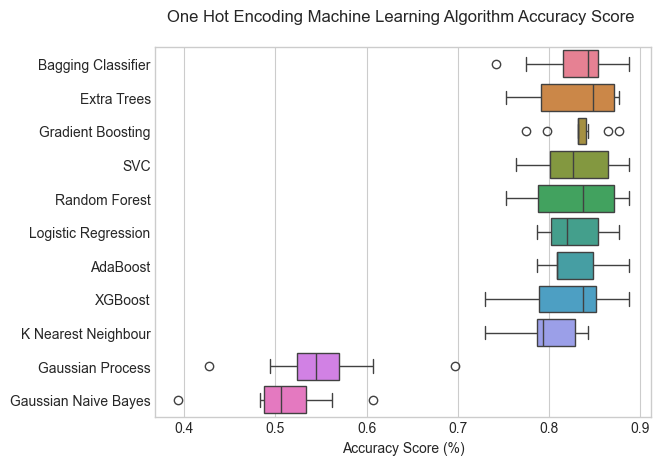

In [125]:
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('One Hot Encoding Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

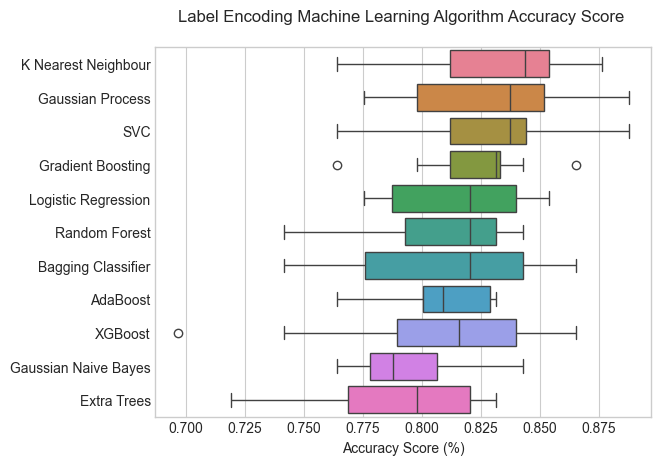

In [126]:
h_result_df = h_result_df.drop(['mean'], axis=1)
sns.boxplot(data=h_result_df.T, orient='h')
plt.title('Label Encoding Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

In [127]:
# Creating a function to view importance.
def importance_plotting(data, xlabel, ylabel, title, n=20):
    sns.set(style="whitegrid")
    ax = data.tail(n).plot(kind='barh')

    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    plt.show()

In [128]:
# add importance to df
fi = {'Features':train.columns.tolist(), 'Importance':xgb.feature_importances_}
importance = pd.DataFrame(fi, index=fi['Features']).sort_values('Importance', ascending=True)
importance.head()

,Features,Importance
F8_420,F8_420,0.0
F8_537,F8_537,0.0
F8_538,F8_538,0.0
F8_539,F8_539,0.0
F8_540,F8_540,0.0


In [129]:
# add importance to df
h_fi = {'Features':h_train.columns.tolist(), 'Importance':h_xgb.feature_importances_}
h_importance = pd.DataFrame(h_fi, index=h_fi['Features']).sort_values('Importance', ascending=True)
h_importance.head()

,Features,Importance
F12,F12,0.000000
F4,F4,0.013666
F8,F8,0.022972
F5,F5,0.024283
F2,F2,0.024415


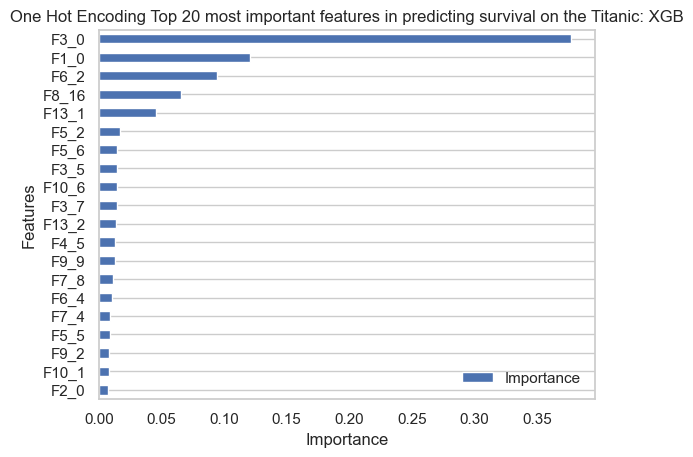

In [130]:
# graph title
title = 'One Hot Encoding Top 20 most important features in predicting survival on the Titanic: XGB'

# plot
importance_plotting(importance, 'Importance', 'Features', title, 20)

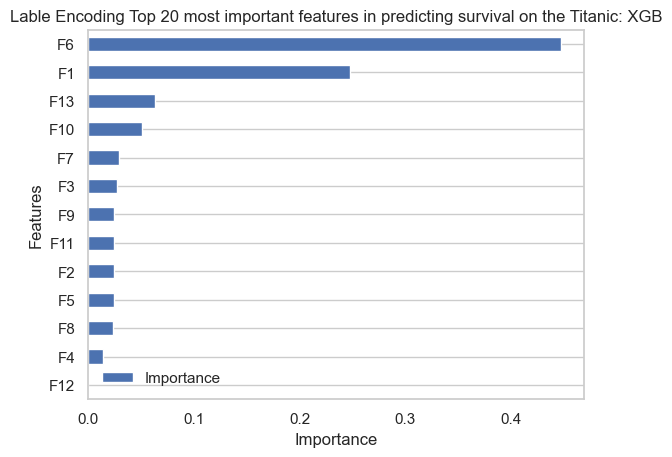

In [131]:
# graph title
title = 'Lable Encoding Top 20 most important features in predicting survival on the Titanic: XGB'

# plot
importance_plotting(h_importance, 'Importance', 'Features', title, 20)

* We put importance into the dataframe. In logistic regression, we use coefficients rather than importance.
* The following is a numpy command that creates a list of the names of the train columns in the column called `Features` and inserts the coefficient into `Importance` for Logistic regression. (In other words, change horizontal to vertical)

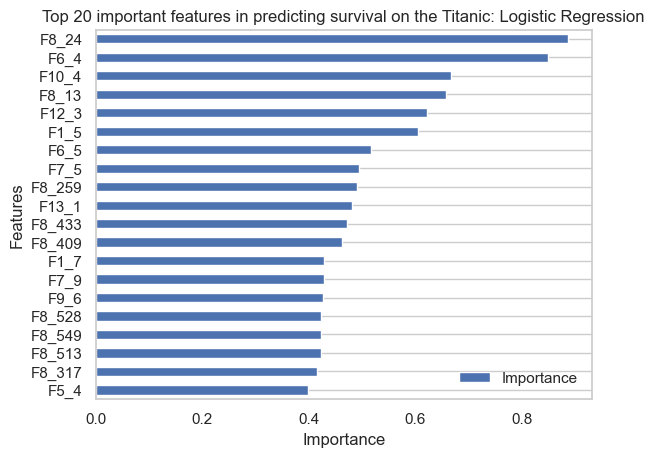

In [132]:
fi = {'Features':train.columns.tolist(), 'Importance':np.transpose(log.coef_[0])}
importance = pd.DataFrame(fi, index=fi['Features']).sort_values('Importance', ascending=True)
# graph title
title = 'Top 20 important features in predicting survival on the Titanic: Logistic Regression'

# plot
importance_plotting(importance, 'Importance', 'Features', title, 20)

In [133]:
# Get item importance for five models
gbc_imp = pd.DataFrame({'Feature':train.columns, 'gbc importance':gbc.feature_importances_})
xgb_imp = pd.DataFrame({'Feature':train.columns, 'xgb importance':xgb.feature_importances_})
ran_imp = pd.DataFrame({'Feature':train.columns, 'ran importance':ran.feature_importances_})
ext_imp = pd.DataFrame({'Feature':train.columns, 'ext importance':ext.feature_importances_})
ada_imp = pd.DataFrame({'Feature':train.columns, 'ada importance':ada.feature_importances_})

# merge for one df
importances = gbc_imp.merge(xgb_imp, on='Feature').merge(ran_imp, on='Feature').merge(ext_imp, on='Feature').merge(ada_imp, on='Feature')

# Mean
importances['Average'] = importances.mean(numeric_only=True, axis=1)

# ranking
importances = importances.sort_values(by='Average', ascending=False).reset_index(drop=True)

In [134]:
importances

,Feature,gbc importance,xgb importance,ran importance,ext importance,ada importance,Average
0,F3_0,0.111246,0.377339,0.041813,0.028954,0.00,0.111870
1,F1_0,0.234934,0.121009,0.047030,0.049239,0.02,0.094442
2,F6_2,0.200625,0.094403,0.041970,0.052168,0.04,0.085833
3,F12_1,0.073042,0.000000,0.038229,0.027373,0.02,0.031729
4,F13_1,0.034387,0.045390,0.013926,0.012446,0.04,0.029230
...,...,...,...,...,...,...,...
938,F8_736,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
939,F8_737,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
940,F8_738,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
941,F8_739,0.000000,0.000000,0.000000,0.000000,0.00,0.000000


In [135]:
# Get item importance for five models
h_gbc_imp = pd.DataFrame({'Feature':h_train.columns, 'gbc importance':h_gbc.feature_importances_})
h_xgb_imp = pd.DataFrame({'Feature':h_train.columns, 'xgb importance':h_xgb.feature_importances_})
h_ran_imp = pd.DataFrame({'Feature':h_train.columns, 'ran importance':h_ran.feature_importances_})
h_ext_imp = pd.DataFrame({'Feature':h_train.columns, 'ext importance':h_ext.feature_importances_})
h_ada_imp = pd.DataFrame({'Feature':h_train.columns, 'ada importance':h_ada.feature_importances_})

# merge for one df
h_importances = h_gbc_imp.merge(h_xgb_imp, on='Feature') \
    .merge(h_ran_imp, on='Feature') \
    .merge(h_ext_imp, on='Feature') \
    .merge(h_ada_imp, on='Feature')

# Mean
h_importances['Average'] = h_importances.mean(numeric_only=True, axis=1)

# ranking
h_importances = h_importances.sort_values(by='Average', ascending=False).reset_index(drop=True)

In [136]:
h_importances

,Feature,gbc importance,xgb importance,ran importance,ext importance,ada importance,Average
0,F8,0.141651,0.022972,0.311826,0.313729,0.52,0.262036
1,F6,0.492888,0.446938,0.095977,0.088030,0.06,0.236766
2,F1,0.164496,0.247885,0.091166,0.061399,0.04,0.120989
3,F7,0.039208,0.029459,0.067131,0.062221,0.12,0.063604
4,F10,0.062450,0.050470,0.050167,0.043297,0.08,0.057277
5,F13,0.038881,0.063483,0.043498,0.055850,0.04,0.048342
6,F5,0.017173,0.024283,0.085477,0.074366,0.02,0.044260
7,F9,0.018969,0.024689,0.044581,0.044761,0.08,0.042600
8,F2,0.002882,0.024415,0.040525,0.074961,0.00,0.028557
9,F12,0.000520,0.000000,0.044990,0.063490,0.02,0.025800


<a id = "part8"></a>
## Reset model according to importance
[Go to the Table of Contents](#table_of_contents)

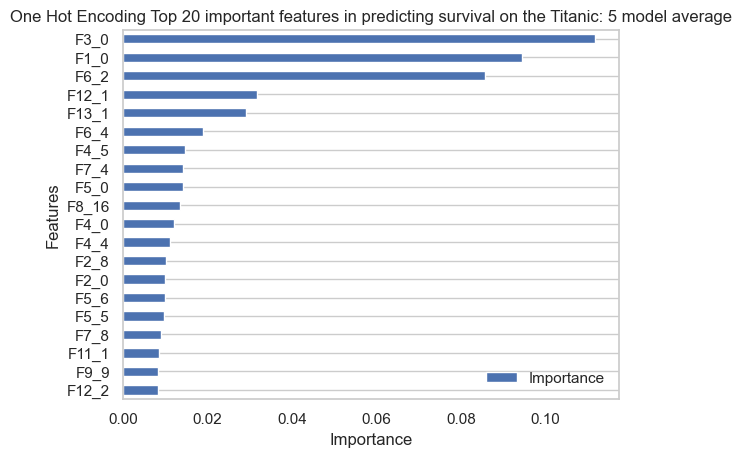

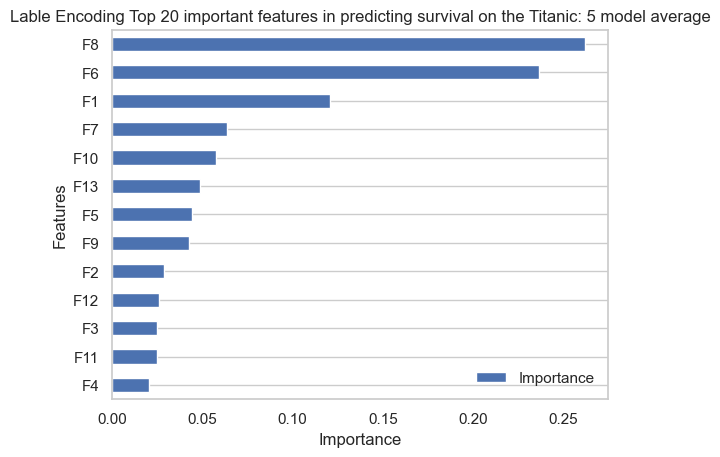

In [137]:
# add importances to df
fi = {'Features':importances['Feature'], 'Importance':importances['Average']}
importance = pd.DataFrame(fi).set_index('Features').sort_values('Importance', ascending=True)

h_fi = {'Features':h_importances['Feature'], 'Importance':h_importances['Average']}
h_importance = pd.DataFrame(h_fi).set_index('Features').sort_values('Importance', ascending=True)

# graph title
title = 'One Hot Encoding Top 20 important features in predicting survival on the Titanic: 5 model average'

# plot
importance_plotting(importance, 'Importance', 'Features', title, 20)

# graph title
title = 'Lable Encoding Top 20 important features in predicting survival on the Titanic: 5 model average'

# plot
importance_plotting(h_importance, 'Importance', 'Features', title, 20)

In [141]:
importance1 = importance[-381:]

h_importance1 = h_importance

In [142]:
importance1[371:381]

,Importance
Features,
F8_16,0.013518
F5_0,0.014143
F7_4,0.014255
F4_5,0.014708
F6_4,0.018845
F13_1,0.029230
F12_1,0.031729
F6_2,0.085833
F1_0,0.094442


In [143]:
h_importance1

,Importance
Features,
F4,0.020319
F11,0.024490
F3,0.024960
F12,0.025800
F2,0.028557
F9,0.042600
F5,0.044260
F13,0.048342
F10,0.057277


In [144]:
# get 380 importance
mylist = list(importance1.index)
h_mylist = list(h_importance1.index)

In [145]:
train1 = pd.DataFrame()
test1 = pd.DataFrame()

h_train1 = pd.DataFrame()
h_test1 = pd.DataFrame()

for i in mylist:
    train1[i] = train[i]
    test1[i]= test[i]

for i in h_mylist:
    h_train1[i] = h_train[i]
    h_test1[i]= h_test[i]

In [146]:
train1.head()

,F8_386,F8_103,F8_424,F8_551,F8_425,F8_625,F8_564,F8_19,F8_61,F8_531,...,F8_16,F5_0,F7_4,F4_5,F6_4,F13_1,F12_1,F6_2,F1_0,F3_0
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,True,True,False


In [147]:
h_train1.head()

,F4,F11,F3,F12,F2,F9,F5,F13,F10,F7,F1,F6,F8
0,0,0,2,0,0,1,3,2,1,2,0,1,0
1,2,1,0,1,5,2,0,0,1,8,2,4,1
2,5,0,0,1,4,3,0,2,0,3,0,3,2
3,2,0,0,1,5,0,0,0,1,8,2,4,3
4,0,0,1,0,0,0,6,2,0,4,0,1,4


In [148]:
train = train1
test = test1

h_train = h_train1
h_test = h_test1

# re-define model variables
X_train = train
X_test = test

h_X_train = h_train
h_X_test = h_test

# change.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

h_X_train = scaler.fit_transform(h_X_train)
h_X_test = scaler.transform(h_X_test)

In [149]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

h_ran = RandomForestClassifier(random_state=1)
h_knn = KNeighborsClassifier()
h_log = LogisticRegression()
h_xgb = XGBClassifier()
h_gbc = GradientBoostingClassifier()
h_svc = SVC(probability=True)
h_ext = ExtraTreesClassifier()
h_ada = AdaBoostClassifier()
h_gnb = GaussianNB()
h_gpc = GaussianProcessClassifier()
h_bag = BaggingClassifier()

models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]
h_models = [h_ran, h_knn, h_log, h_xgb, h_gbc, h_svc, h_ext, h_ada, h_gnb, h_gpc, h_bag]
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores = {}
h_scores = {}

# Continue to train the model consecutively and cross-validate.
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    h_models[ind].fit(h_X_train, y_train)
    
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    h_acc = cross_val_score(h_models[ind], h_X_train, y_train, scoring="accuracy", cv = 10)
    
    scores[model_names[ind]] = acc
    h_scores[model_names[ind]] = h_acc

In [150]:
# create result df
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)#.reset_index()
result_df.head(11)

,0,1,2,3,4,5,6,7,8,9,mean
Bagging Classifier,0.788889,0.910112,0.775281,0.876404,0.887640,0.842697,0.865169,0.764045,0.853933,0.820225,0.838439
Extra Trees,0.788889,0.887640,0.730337,0.887640,0.887640,0.865169,0.853933,0.775281,0.865169,0.820225,0.836192
Logistic Regression,0.822222,0.842697,0.797753,0.853933,0.887640,0.820225,0.797753,0.820225,0.853933,0.831461,0.832784
Random Forest,0.811111,0.876404,0.752809,0.887640,0.876404,0.831461,0.842697,0.764045,0.853933,0.820225,0.831673
Gradient Boosting,0.822222,0.831461,0.775281,0.876404,0.865169,0.831461,0.842697,0.797753,0.831461,0.842697,0.831660
XGBoost,0.755556,0.831461,0.730337,0.887640,0.842697,0.842697,0.842697,0.775281,0.865169,0.831461,0.820499
AdaBoost,0.800000,0.808989,0.786517,0.865169,0.853933,0.808989,0.808989,0.775281,0.808989,0.831461,0.814831
Gaussian Process,0.788889,0.786517,0.752809,0.775281,0.808989,0.808989,0.764045,0.775281,0.842697,0.842697,0.794619
SVC,0.800000,0.786517,0.775281,0.764045,0.842697,0.741573,0.764045,0.797753,0.853933,0.820225,0.794607
K Nearest Neighbour,0.744444,0.764045,0.752809,0.842697,0.808989,0.820225,0.808989,0.730337,0.842697,0.820225,0.793546


In [151]:
# create result df
h_results = pd.DataFrame(h_scores).T
h_results['mean'] = h_results.mean(1)

h_result_df = h_results.sort_values(by='mean', ascending=False)#.reset_index()
h_result_df.head(11)

,0,1,2,3,4,5,6,7,8,9,mean
K Nearest Neighbour,0.833333,0.853933,0.764045,0.876404,0.876404,0.820225,0.808989,0.797753,0.853933,0.853933,0.833895
Gaussian Process,0.844444,0.842697,0.786517,0.887640,0.865169,0.831461,0.786517,0.775281,0.853933,0.831461,0.830512
SVC,0.844444,0.831461,0.797753,0.887640,0.842697,0.808989,0.820225,0.764045,0.853933,0.842697,0.829388
Gradient Boosting,0.833333,0.831461,0.764045,0.808989,0.831461,0.820225,0.831461,0.797753,0.865169,0.842697,0.822659
Random Forest,0.822222,0.842697,0.741573,0.842697,0.842697,0.831461,0.797753,0.786517,0.842697,0.820225,0.817054
Logistic Regression,0.788889,0.786517,0.775281,0.853933,0.842697,0.786517,0.808989,0.831461,0.831461,0.842697,0.814844
Bagging Classifier,0.822222,0.808989,0.741573,0.820225,0.876404,0.831461,0.831461,0.775281,0.831461,0.786517,0.812559
AdaBoost,0.766667,0.808989,0.797753,0.831461,0.831461,0.808989,0.831461,0.764045,0.820225,0.808989,0.807004
XGBoost,0.822222,0.808989,0.741573,0.696629,0.876404,0.797753,0.831461,0.797753,0.820225,0.842697,0.803571
Gaussian Naive Bayes,0.788889,0.775281,0.775281,0.842697,0.797753,0.786517,0.786517,0.764045,0.820225,0.808989,0.794619


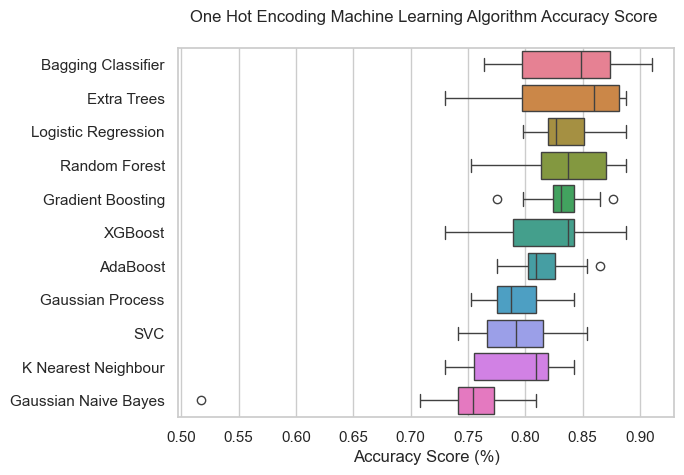

In [152]:
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('One Hot Encoding Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

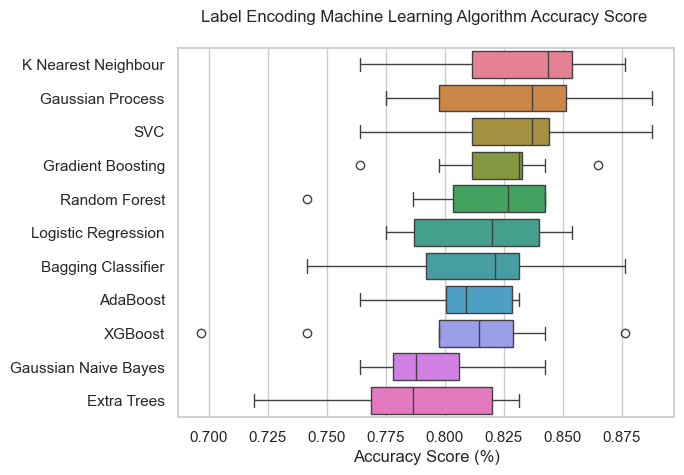

In [153]:
h_result_df = h_result_df.drop(['mean'], axis=1)
sns.boxplot(data=h_result_df.T, orient='h')
plt.title('Label Encoding Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

<a id = "part9"></a>
## Tuning Hyper parameter
[Go to the Table of Contents](#table_of_contents)

### SVC
- Scikit-Learn supports three model optimization tools: `validation_curve`/ `GridSearchCV`/ `ParameterGrid`.
- When the `fit` method is called, grid search automatically creates multiple internal models and runs them all to find the optimal parameters.
- `bestscore` is the highest score, and `best estimator` is the model with the parameters that produced the highest score.
- The values of `c` and `gamma` are typically multiples of 10.
- The `gamma` parameter defines the extent of the influence of a single training example, where a low value indicates 'far' and a high value indicates 'close'. The `gamma` parameter can be seen as the inverse of the influence radius of the samples selected by the model as support vectors.
- The `C` parameter eliminates the misclassification of training examples for the simplicity of the decision surface. The lower the `C`, the smoother the decision surface. A higher `C` allows the model to freely choose more samples as support vectors, aiming to correctly classify all training examples.
- `Verbose` is a Boolean value. If set to `True`, it provides detailed information, but it takes a little longer.
- `cv = 5` means cross-validation is carried out in 5 folds.

In [173]:
params = {}

In [174]:
Cs = [0.01, 0.1, 1, 5, 10, 15, 20, 50]
gammas = [0.001, 0.01, 0.1]

hyperparams = {'C': Cs, 'gamma' : gammas}

gd=GridSearchCV(estimator = SVC(probability=True), param_grid = hyperparams,
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

# 모델 fiting 및 결과
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)
params['scv'] = gd.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
0.8350072186303434
{'C': 5, 'gamma': 0.001}


In [175]:
params

{'scv': {'C': 5, 'gamma': 0.001}}

### Gradient Boosting Classifier
- `learning_rate` reduces the contribution of each tree.
- `n_estimator` is the number of trees in each case.

In [176]:
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.5]
n_estimators = [100, 1000, 2000]
max_depth = [3, 5, 10, 15]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd=GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = hyperparams,
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)
params['gb'] = gd.best_params_

Fitting 5 folds for each of 15 candidates, totalling 75 fits
0.8372669637813068
{'learning_rate': 0.2, 'n_estimators': 1000}


### Logistic Regression
- The regression model using Penalty - L1 is called Lasso Regression, and the model using L2 is called Ridge Regression.
The main difference between these two is the penalty. Ridge Regression adds the "square size" of coefficients as a penalty term to the loss function. Because the L2-norm squares the error (the root increases when error > 1), the model is much more sensitive than the L1-norm, as it sees much larger errors (e vs e^2). Therefore, it adjusts the model to minimize the error.
- C is an estimator. It is an array of 10 elements in logspace dimension 1, from 0 to 4 as the estimator.

In [177]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

hyperparams = {'penalty': penalty, 'C': C}

gd=GridSearchCV(estimator = LogisticRegression(), param_grid = hyperparams,
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)
params['lr'] = gd.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.8271797125102003
{'C': 2.7825594022071245, 'penalty': 'l2'}


### XGBoost Step 1.

In [182]:
learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [10, 50, 100, 250, 500, 1000]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd=GridSearchCV(estimator = XGBClassifier(), param_grid = hyperparams,
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)
params['xgb'] = gd.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
0.8338836231247253
{'learning_rate': 0.2, 'n_estimators': 10}


### XGB Step 2.

In [183]:
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
min_child_weight = [1, 2, 3, 4, 5, 6]

hyperparams = {'max_depth': max_depth, 'min_child_weight': min_child_weight}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10), param_grid = hyperparams,
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)
params['xgb'].update(gd.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
0.8350197727700708
{'max_depth': 5, 'min_child_weight': 4}


### XGB Step 3.

In [184]:
gamma = [i*0.1 for i in range(0,5)]

hyperparams = {'gamma': gamma}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6,
                                          min_child_weight=1), param_grid = hyperparams,
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)
params['xgb'].update(gd.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.8338899001945892
{'gamma': 0.4}


### XGB Step 4

In [185]:
subsample = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
colsample_bytree = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]

hyperparams = {'subsample': subsample, 'colsample_bytree': colsample_bytree}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6,
                                          min_child_weight=1, gamma=0), param_grid = hyperparams,
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)
params['xgb'].update(gd.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
0.8350134957002071
{'colsample_bytree': 0.65, 'subsample': 0.65}


### XGB Step 5

In [187]:
reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]

hyperparams = {'reg_alpha': reg_alpha}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6,
                                          min_child_weight=1, gamma=0, subsample=1, colsample_bytree=1),
                                         param_grid = hyperparams, verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)
params['xgb'].update(gd.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.8338836231247253
{'reg_alpha': 1e-05}


### Gaussian Process

In [189]:
n_restarts_optimizer = [0, 1, 2, 3]
max_iter_predict = [1, 2, 5, 10, 20, 35, 50, 100]
warm_start = [True, False]

hyperparams = {'n_restarts_optimizer': n_restarts_optimizer, 'max_iter_predict': max_iter_predict, 'warm_start': warm_start}

gd=GridSearchCV(estimator = GaussianProcessClassifier(), param_grid = hyperparams,
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)
params['gp'] = gd.best_params_

Fitting 5 folds for each of 64 candidates, totalling 320 fits
0.8013495700207143
{'max_iter_predict': 1, 'n_restarts_optimizer': 0, 'warm_start': True}


### Adaboost.

In [190]:
n_estimators = [10, 100, 200, 500]
learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

hyperparams = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

gd=GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyperparams,
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)
params['ab'] = gd.best_params_

Fitting 5 folds for each of 28 candidates, totalling 140 fits
0.8394827694432239
{'learning_rate': 0.5, 'n_estimators': 500}


### KNN

In [191]:
n_neighbors = [1, 2, 3, 4, 5]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = [1, 2, 3, 4, 5, 10]

hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size,
               'n_neighbors': n_neighbors}

gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams,
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)
params['knn'] = gd.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits
0.8193396522503296
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'distance'}


### Random Forest.

In [192]:
n_estimators = [10, 50, 100, 200]
max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 6]
min_samples_leaf = [2, 6]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator = RandomForestClassifier(), param_grid = hyperparams,
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)
params['rn'] = gd.best_params_

Fitting 5 folds for each of 128 candidates, totalling 640 fits
0.8338899001945892
{'max_depth': None, 'max_features': 0.1, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 50}


### Extra Trees

In [193]:
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 10]
min_samples_leaf = [2, 10]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator = ExtraTreesClassifier(), param_grid = hyperparams,
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)
params['et'] = gd.best_params_

Fitting 5 folds for each of 160 candidates, totalling 800 fits
0.8361496453455526
{'max_depth': None, 'max_features': 0.2, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 100}


### Bagging Classifier

In [194]:
n_estimators = [10, 50, 75, 100, 200]
max_samples = [0.1, 0.2, 0.5, 0.8, 1.0]
max_features = [0.1, 0.2, 0.5, 0.8, 1.0]

hyperparams = {'n_estimators': n_estimators, 'max_samples': max_samples, 'max_features': max_features}

gd=GridSearchCV(estimator = BaggingClassifier(), param_grid = hyperparams,
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)
params['bc'] = gd.best_params_

Fitting 5 folds for each of 125 candidates, totalling 625 fits
0.8428472788902142
{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 200}


In [195]:
params

{'scv': {'C': 5, 'gamma': 0.001},
 'gb': {'learning_rate': 0.2, 'n_estimators': 1000},
 'lr': {'C': 2.7825594022071245, 'penalty': 'l2'},
 'xgb': {'max_iter_predict': 1, 'n_restarts_optimizer': 0, 'warm_start': True},
 'gp': {'max_iter_predict': 1, 'n_restarts_optimizer': 0, 'warm_start': True},
 'ab': {'learning_rate': 0.5, 'n_estimators': 500},
 'knn': {'algorithm': 'auto',
  'leaf_size': 1,
  'n_neighbors': 5,
  'weights': 'distance'},
 'rn': {'max_depth': None,
  'max_features': 0.1,
  'min_samples_leaf': 2,
  'min_samples_split': 6,
  'n_estimators': 50},
 'et': {'max_depth': None,
  'max_features': 0.2,
  'min_samples_leaf': 10,
  'min_samples_split': 2,
  'n_estimators': 100},
 'bc': {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 200}}

<a id = "part10"></a>
## Re-training Model
[Go to the Table of Contents](#table_of_contents)

In [196]:
ran = RandomForestClassifier(max_depth=None, max_features=0.1, min_samples_leaf=2, min_samples_split=6, n_estimators=50, random_state=1)

knn = KNeighborsClassifier(algorithm='auto', leaf_size=1, n_neighbors=5, weights='distance')

log = LogisticRegression(C=2.7825594022071245, penalty='l2')

xgb = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=5,
                                          min_child_weight=4, gamma=0.4, subsample=0.65, colsample_bytree=1, reg_alpha=1e-05)

gbc = GradientBoostingClassifier(learning_rate=0.2, n_estimators=1000)

svc = SVC(probability=True, gamma=0.001, C=5)

ext = ExtraTreesClassifier(max_depth=None, max_features=0.2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, random_state=1)

ada = AdaBoostClassifier(learning_rate=0.5, n_estimators=500, random_state=1)

gpc = GaussianProcessClassifier(max_iter_predict=1, n_restarts_optimizer=0, warm_start=True)

bag = BaggingClassifier(max_features=1, max_samples=1.0, n_estimators=200, random_state=1)

models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores3 = {}

# Sequentially fit and cross validate all models
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores3[model_names[ind]] = acc

/Users/hotamul/.pyenv/versions/kaggle/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hotamul/.pyenv/versions/kaggle/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

In [197]:
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)
result_df = results.sort_values(by='mean', ascending=False)
result_df.head(11)

,0,1,2,3,4,5,6,7,8,9,mean
Bagging Classifier,0.788889,0.910112,0.775281,0.876404,0.887640,0.842697,0.865169,0.764045,0.853933,0.820225,0.838439
Extra Trees,0.788889,0.887640,0.730337,0.887640,0.887640,0.865169,0.853933,0.775281,0.865169,0.820225,0.836192
Logistic Regression,0.822222,0.842697,0.797753,0.853933,0.887640,0.820225,0.797753,0.820225,0.853933,0.831461,0.832784
Random Forest,0.811111,0.876404,0.752809,0.887640,0.876404,0.831461,0.842697,0.764045,0.853933,0.820225,0.831673
Gradient Boosting,0.822222,0.831461,0.775281,0.876404,0.865169,0.831461,0.842697,0.797753,0.831461,0.842697,0.831660
XGBoost,0.755556,0.831461,0.730337,0.887640,0.842697,0.842697,0.842697,0.775281,0.865169,0.831461,0.820499
AdaBoost,0.800000,0.808989,0.786517,0.865169,0.853933,0.808989,0.808989,0.775281,0.808989,0.831461,0.814831
Gaussian Process,0.788889,0.786517,0.752809,0.775281,0.808989,0.808989,0.764045,0.775281,0.842697,0.842697,0.794619
SVC,0.800000,0.786517,0.775281,0.764045,0.842697,0.741573,0.764045,0.797753,0.853933,0.820225,0.794607
K Nearest Neighbour,0.744444,0.764045,0.752809,0.842697,0.808989,0.820225,0.808989,0.730337,0.842697,0.820225,0.793546


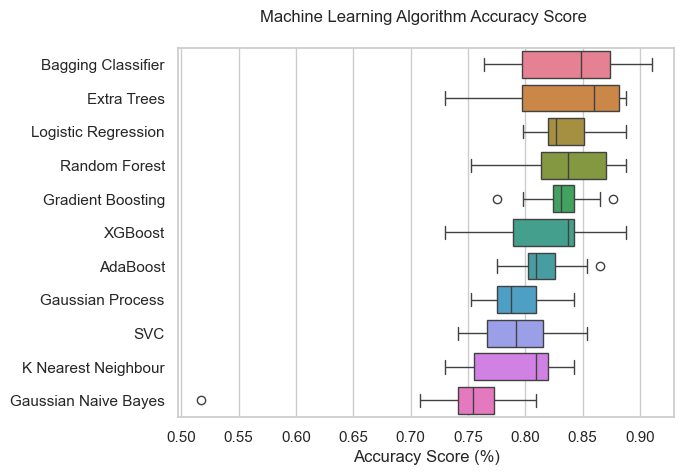

In [198]:
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

<a id = "part11"></a>
## Last Voting
[Go to the Table of Contents](#table_of_contents)

In [199]:
# Hard voting
grid_hard = VotingClassifier(estimators = [('Random Forest', ran),
                                           ('Logistic Regression', log),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada),
                                           ('Gaussian Process', gpc),
                                           ('SVC', svc),
                                           ('K Nearest Neighbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'hard')

grid_hard_cv = model_selection.cross_validate(grid_hard, X_train, y_train, cv=10)
grid_hard.fit(X_train, y_train)

print("Hard voting on test set score mean: {:.2f}". format(grid_hard_cv['test_score'].mean() * 100))

Hard voting on test set score mean: 84.51


In [200]:
grid_soft = VotingClassifier(estimators = [('Random Forest', ran),
                                           ('Logistic Regression', log),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada),
                                           ('Gaussian Process', gpc),
                                           ('SVC', svc),
                                           ('K Nearest Neighbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'soft')

grid_soft_cv = model_selection.cross_validate(grid_soft, X_train, y_train, cv=10)
grid_soft.fit(X_train, y_train)

print("Soft voting on test set score mean: {:.2f}". format(grid_soft_cv['test_score'].mean() * 100))

Soft voting on test set score mean: 84.40


<a id = "part12"></a>
## Last Prediction Model
[Go to the Table of Contents](#table_of_contents)

In [201]:
predictions = grid_soft.predict(X_test)

submission = pd.concat([pd.DataFrame(passId), pd.DataFrame(predictions)], axis = 'columns')

submission.columns = ["PassengerId", "Survived"]
submission.to_csv('new_new_titanic_submission_soft.csv', header = True, index = False)

In [202]:
predictions = grid_hard.predict(X_test)

submission = pd.concat([pd.DataFrame(passId), pd.DataFrame(predictions)], axis = 'columns')

submission.columns = ["PassengerId", "Survived"]
submission.to_csv('new_new_titanic_submission_hard.csv', header = True, index = False)

<a id = "part13"></a>
## Submissions
[Go to the Table of Contents](#table_of_contents)

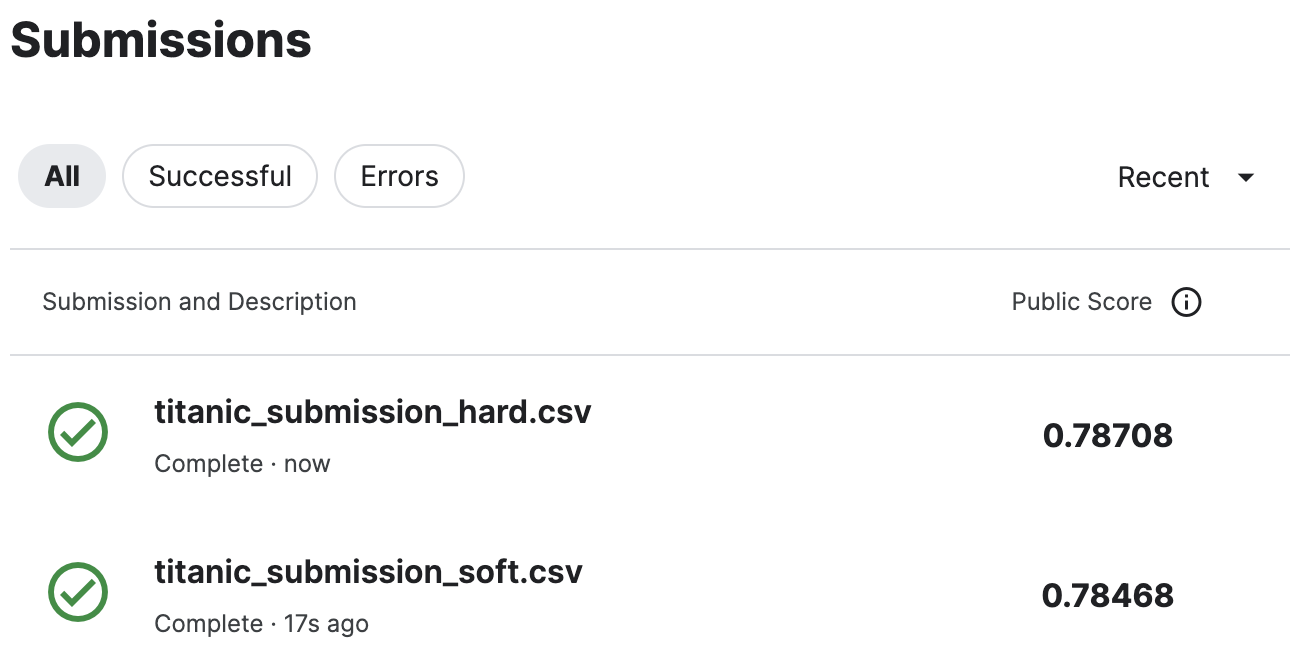


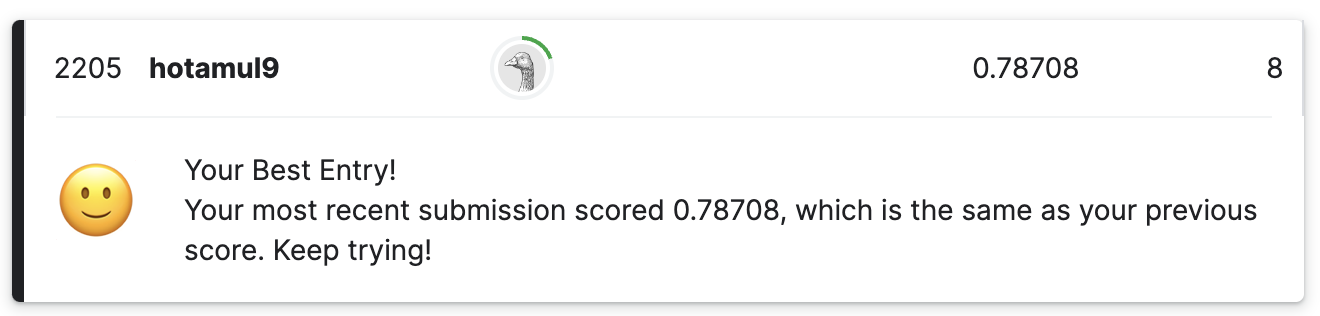

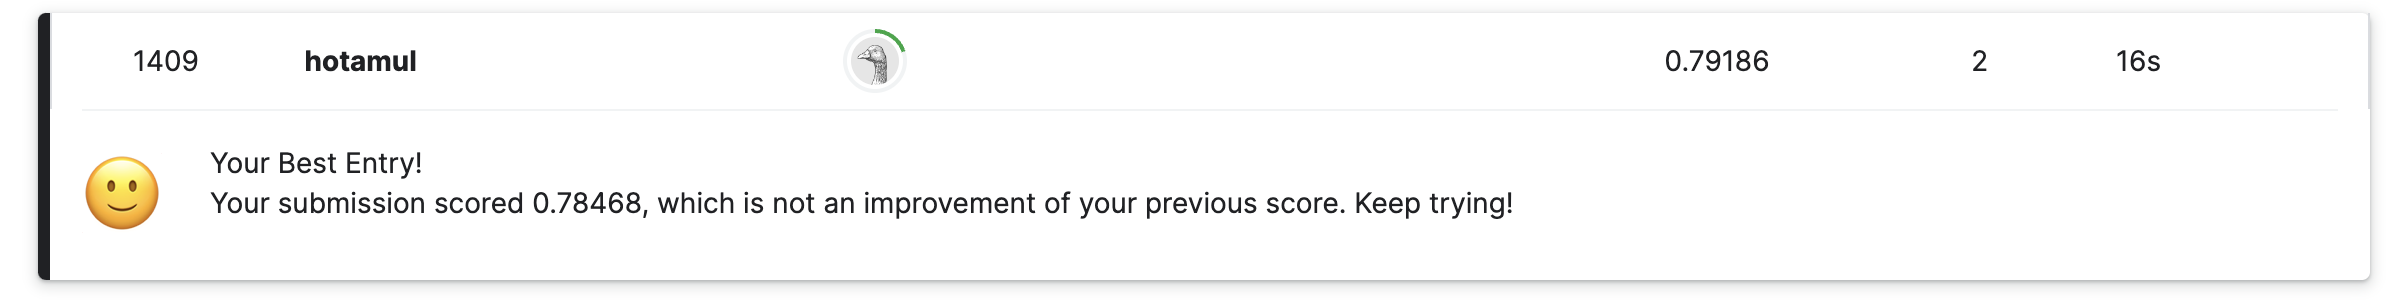

### Result
- **2024-01-19 2205/15978**
- **2024-01-25 1409/16147**